<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals + Milestone Project : BitPredict

Lets write code to predict the price of Bitcoin based on the historical price of Bitcoin

# Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-01 16:19:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-09-01 16:19:21 (10.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



## Importing time series with pandas

In [2]:
import pandas as pd
# Read in our bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" ,
parse_dates = ["Date"] ,  # parse_dates parametresi, belirli sütunların tarih ve saat olarak ayrılması gerektiğini belirtir. Bu durumda, "Date" sütunu tarih ve saat olarak ayrılacak.
index_col = ["Date"]     # index_col parametresi, veri çerçevesinin hangi sütununun endeks (indeks) olarak kullanılacağını belirtir. Bu durumda, "Date" sütunu endeks olarak kullanılacak, yani her satırın bir tarih ve saat indeksi olacak.
)
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

In [5]:
8*365  # We have data into 8 years

2920

We have collected the historical price of bitcoin for the past 8 years but there is 2787 samples.

Typically deep learning models usually like lots and lots and lost of samples ( where lots and lots and lots can be thousand to tens of thousand to millions )

A smaller number of samples is something you will often run into with time series problems.

**Note**: The seasionality of a time series dataset is referred as the number of samples per year. So for our bitcoin data it has a seasionality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.


In [6]:
# Only want closing price for each day

bitcoin_prices = pd.DataFrame( df["Closing Price (USD)"] ).rename(columns = {"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


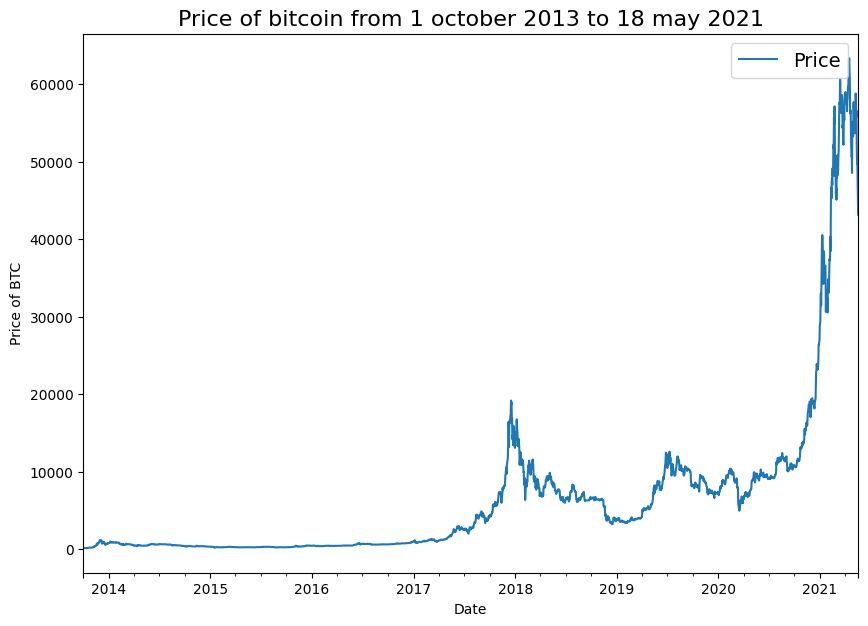

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = ( 10 , 7 ))
plt.ylabel("Price of BTC")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14);

# Read CSV files with Python

In [8]:
import csv
from datetime import datetime
timesteps = []  # For our date variables.
btc_price = []
# r means read and f means file
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" , "r") as f:
  csv_reader = csv.reader(f , delimiter = "," )  # Datamızı raw formatta açarsak variableların virgüllerle ayrıldığını görüyoruz bu yüzden delimiter ı virgüle eşitlememiz gerek
  next(csv_reader) # Skip first line(this gets rid of the column titles)(Yani Closing Price (USD)	24h Open (USD) gibi headerları pas geçiyor. )
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] , "%Y-%m-%d"))  # Burda aslında line[1] bizim date variablelarımız datamızdaki o date variablelarını alıyoruz. %Y : year , %m : month , %d : date. Get the dates as dates (not string)
    btc_price.append(float(line[2]))  # Get the closing price as float

# View the firs 10 of each
timesteps[ : 10] , btc_price[ : 10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

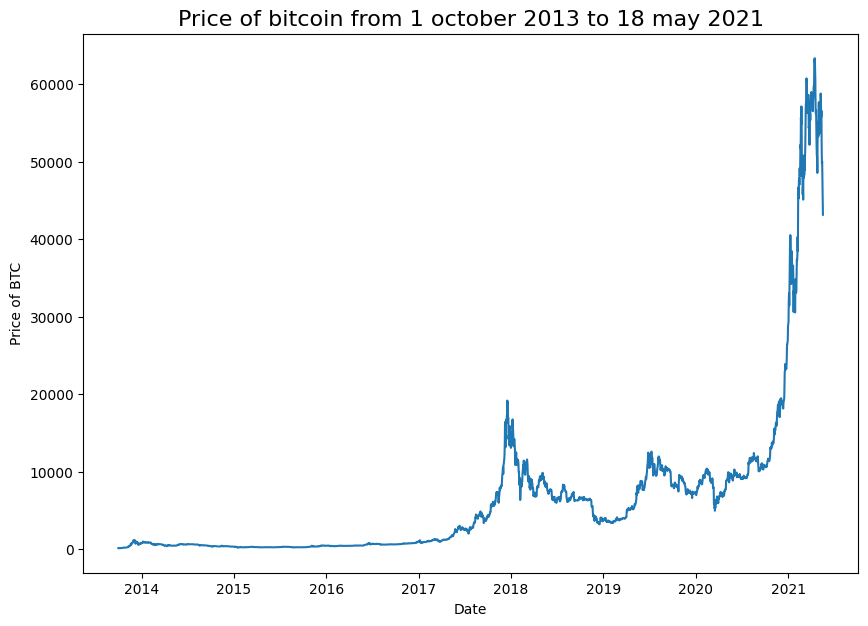

In [9]:
# Plot our python csv file
plt.figure(figsize = (10 , 7))
plt.plot(timesteps ,
         btc_price
         )
plt.ylabel("Price of BTC")
plt.xlabel("Date")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16);


## Format data part 1 : Create train and test sets of our data

### Create train and test sets with time series data (wrong way)

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()  #.index dediğimizde direkt date kısmını alıyoruz orayı index olarak çekmiştik yukarda.
prices = bitcoin_prices["Price"].to_numpy()
timesteps[ : 10] , prices[ : 10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(timesteps , # Dates
                                                       prices , # BTC prices
                                                       test_size = 0.2 ,
                                                       random_state  = 42
                                                       )
X_train.shape , X_test.shape , y_train.shape , y_test.shape


((2229,), (558,), (2229,), (558,))

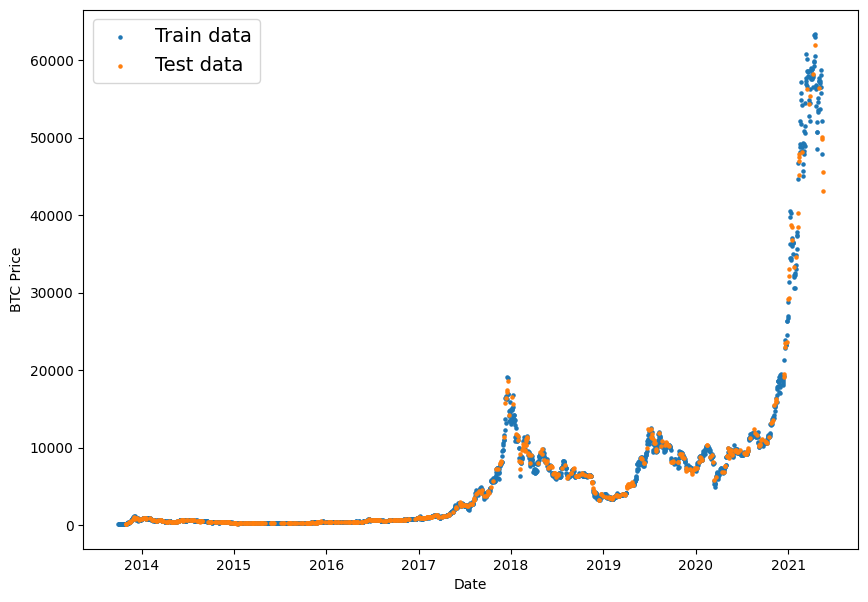

In [12]:
# Lets plot wrong train and test splits
plt.figure(figsize = ( 10 , 7 ))
plt.scatter(X_train , y_train , s = 5 , label = "Train data")
plt.scatter(X_test , y_test , s = 5 , label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show();

### Create train/test sets for time series (the right way)

#### train_test_split kullandıgımızda biz train ve test datamızı random sekilde olusturuyoruz yani shuffle etmis oluyoruz. Fakat biz time series problemlerinde future predict edecegimiz icin train datamızı bi yerde kesip tam ondan sonrasını test datamız yapmamız gerekiyor. Biz kendimiz bir future data olusturamayız zaten olusturabilsek bunları yapmamıza ihtiyacımız kalmazdı. Bu yüzden en eski tarihten belli bir zamana kadar train datamızı yapıcaz ve sonrasını da test datamız olarak belirleyeceğiz. Yani test datamızı aslında future gibi düsüneceğiz ve modelimiz ne kadar iyi calısıyor onu test edeceğiz.

In [13]:
# Create train/test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train , 20% test - you can change these values as needed , e.g. 90/10 or 95/5

# Create train data splits (everything before splits)
X_train , y_train = timesteps[ : split_size ] , prices[ : split_size]

# Create test data splits
X_test , y_test = timesteps[ split_size : ] , prices[ split_size : ]

len(X_train) , len(X_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

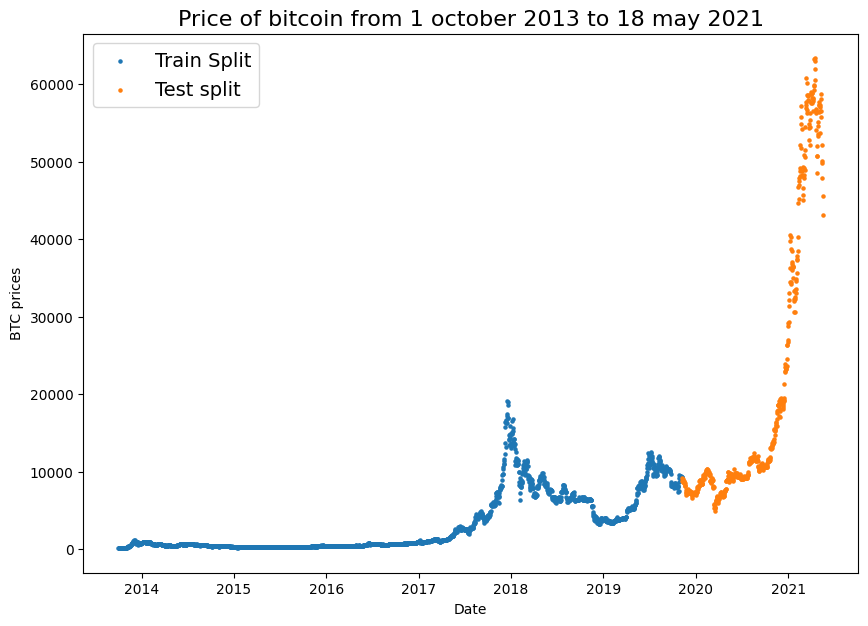

In [14]:
# Plot right splits
plt.figure(figsize = ( 10 , 7))
plt.scatter(X_train , y_train , s = 5 , label = "Train Split")
plt.scatter(X_test , y_test , s = 5 , label = "Test split")
plt.xlabel("Date")
plt.ylabel("BTC prices")
plt.title("Price of bitcoin from 1 october 2013 to 18 may 2021" , fontsize = 16)
plt.legend(fontsize = 14)
plt.show();

## Create a plotting function

In [15]:
## Create a function to plot time series data

def plot_time_series(timesteps , values , format = "." , start = 0 , end = None , label = None):
  """
  Plots timesteps (a series of points in time) againts values (a series of values across timesteps)

  Parameters
  ----------------
  timesteps : array of timesteps values
  values : array of values across time
  format : style of plot , default "."
  start : where to start plot (setting a value will index from start of timesteps and values)
  end : where to end plot ( similar to start but for end)
  label : label to show on plot about values
  """
  # Plot the series
  plt.plot(timesteps[start:end] , values[start:end] , format , label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14) # Make label bigger
  plt.grid(True)


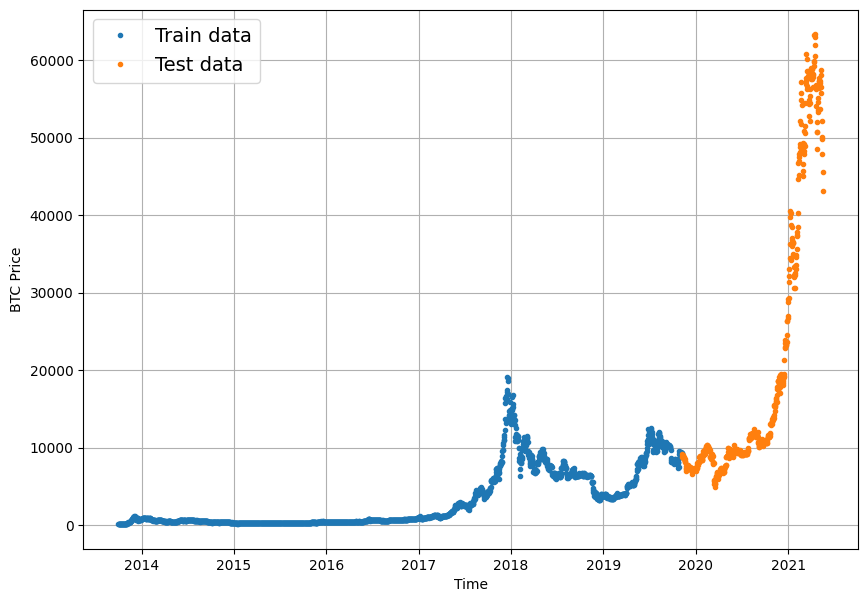

In [16]:
# Test out our plotting function
plt.figure(figsize = ( 10 , 7 ))  # Figure ü fonksiyon içinde kullanmamalıyız . matplotlib tidbit bu.
plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , label = "Test data")


## Modelling experiments

We have got some bitcoin historical data , to model it , lets run a series of modelling experiments and see which model performs best

Terms to be familiar with:

* Horizon = number of timesteps into the future we're going to predict


* Window size = number of timesteps we're going to use to predict horizon


Modelling experiments we're running:

* 0 - Naïve model (baseline)
* 1 - Dense model, horizon = 1, window = 7
* 2 - Same as 1, horizon = 1, window = 30
* 3 - Same as 1, horizon = 7, window = 30
* 4 - Conv1D
* 5 - LSTM
* 6 - Same as 1 (but with multivariate data)
* 7 - N-BEATs Algorithm
* 8 - Ensemble (multiple models optimized on different loss functions)
* 9 - Future prediction model (model to predict future values)
* 10 - Same as 1 (but with turkey 🦃 data introduced)

## Model 0 : Naive forcast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1



In [17]:
# Create a naive forcast
naive_forcast = y_test[ : -1]
# Burda yukarıda yazdıgımızı yaptık aslında. naive forcast , y_testteki  için en sondaki y_test valuesunu sildik.

naive_forcast[ : 10 ] , naive_forcast[-10 : ]

# Aşağıdaki değerler aslında bizim naive_forcast predictionlarımız. Yani naive forcast 45604.615 bu değeri predict etmiş ama actual valuesu y_testin içindeki 43144.471. Yani y_testteki actual valueyu bir önceki value olarak predict ediyor.

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [18]:
y_test[-10 : ]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

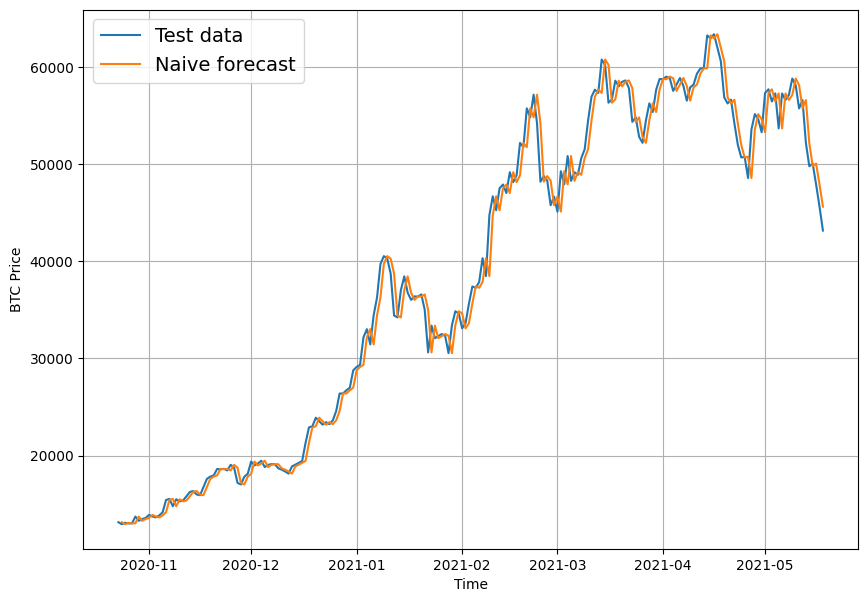

In [19]:
# Plot naive forecast
plt.figure(figsize = ( 10 , 7))
#plot_time_series(timesteps = X_train , values = y_train , label = "Train data")
plot_time_series(timesteps = X_test , values = y_test , format = "-" , start = 350 , label = "Test data")
plot_time_series(timesteps = X_test[ 1 : ] , values = naive_forcast , format = "-" , start = 350 , label = "Naive forecast")
# We get everything after the first index with X_test[ 1 : ], bunu yapmak zorundayız çünkü naive forcastta son variable ı cut off ettik. Yani test datadan 1 eksik variable a sahip.


# Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autogoregressive come up? link : https://otexts.com/fpp3/simple-methods.html

# Our data is non-seasonal

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, lower is better, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8 : https://otexts.com/fpp3/accuracy.html



In [20]:
import tensorflow as tf

In [21]:
# MASE implementation
def mean_absolute_scaled_error(y_true , y_pred):
  """
  Implementing MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs( y_true - y_pred ))  # This is actually basic MAE (mean absolute error). abs mutlak değer.

  # Find MAE of naive forecast ( no seasonality )
  mae_naive_no_season = tf.reduce_mean(tf.abs( y_true[ 1 : ] - y_true[ : -1 ]  ))   # [ : -1]  means that  a new sequence that starts from the beginning and includes all elements except the last one.
  # [ 1 : ] means that ilk element hariç datanın hepsini alıyoruz.
  # Our seasionality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

  # Biz burda direkt aslında bütün modellerimizi naive forecasta göre evaluate edeceğimiz bir evaluation metrics oluşturduk. Biz az önce naive forecast modeli oluşturduğumuz için bu fonksiyonun içine y_pred olarak naive forecast predictionlarımızı gönderdiğimizde 1 değerini alıcaz. Keynote da >1 olunca naive forecasttan daha iyi demesinin sebebi de bu. Biz başka bir modeli MASE ile evaluate ettiğimizde naive forecast modelinden iyi mi yoksa kötü mü test edicez.


In [22]:
mean_absolute_scaled_error( y_true = y_test[ 1 : ] , y_pred = naive_forcast ).numpy()

0.9995699939182624

# All of our evaluation metrics in one function

In [23]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }







In [24]:
naive_results = evaluate_preds( y_true = y_test[ 1 : ] , y_pred =  naive_forcast)
naive_results
# Mae de çıkan sonuç bize y_testteki real valuelarımızın predictionlarda ortalama olarak ne kadar saptıgını söylüyor.
# y_test aslında modelimiz hakkında sadece küçük bir hint veriyor çünkü y_test datamızdaki değerler gelecekteki değerler değil yine past değerlere bakıyoruz.

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Other models you can use for baselines and for actual forecasts

We are focused on tensorflow and deep learning.

However there are plenty of other styles of time series forecasting models you may want to experiment with : https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format data part 2 : Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem

Windowing for one week:
[ 0 , 1 , 2 , 3 , 4 , 5 , 6] -> [7]   (We have dataset like this 0 1 2(these are days in one week) , and we want to predict the next day which is [7]

[ 1 , 2 , 3 , 4 , 5 , 6 , 7] -> [8]   and if we want to predict 8. day , we will do it like this.

[ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] -> [9]  and this is for prediction of 9. day  

horizon is the output size , window is the input size.


In [25]:
# What we want to do with our bitcoin data?
print(f" We want to use this : {btc_price[ : 7]} , to predict this : {btc_price[7]}")

# First part is our datas and the second one is our labels

 We want to use this : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] , to predict this : 123.033


In [26]:
# Lets setup global variables for window and horizon size
HORIZON = 1  # Predict next 1 day
WINDOW_SIZE = 7  # Use the past 7 days (1 week) of bitcoin data to make the prediction

In [27]:
# Create function to label windowed data
def get_labelled_windows( x , horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  e.g. if horizon = 1
  Input =  [ 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ] -> Output = ( [ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , [ 7 ] )  Yani outputu da inputun icinde alıyoruz sonrasında ayırıyoruz ve bizim outputumuz datamızı ve labelımızı iceren bir tuple olarak dönüyor.
  """
  return x[ :  ,  : -horizon ] ,  x[ : , -horizon : ] # For first x , get all rows and for columns , get all except last one(last one is our label) , For second x , get all rows and for columns , get just the last element(which is our label)

In [28]:
# Test out the window labelling function
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
test_window , test_label
# tf.range(8) : Bu ifade, 0 dan 7 ye kadar olan ardışık sayıları içeren bir tensörü oluşturur. TensorFlow'un tf.range() işlevi ardışık bir sayı dizisi oluşturmanızı sağlar.
# tf.expand_dims(tf.range(8) + 1, axis=0): Bu adım, önceki tensörü boyutunu genişleterek 2B bir tensöre dönüştürür. tf.expand_dims() işlevi, belirli bir eksen boyunca boyut eklemek için kullanılır. Bu durumda, axis=0 ile, yeni bir boyut eklenerek satır boyutu artırılır. Bu işlem sonucunda, örneğin, [1, 2, 3, 4, 5, 6, 7, 8] dizisi [1, 8] boyutlarında bir tensöre dönüşecektir.
print(f"Window : {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] -> Label : 7


We have got a way to label our windowed data.

However , this only works on a small scale.

We need a way to do the above across our entire time series .

We could do this with python for loops , however , for large time series , that would be quite slow.

To speed things up , we will leverage numpy's array indexing

 Our function will:

 1. Create a window step of spesific window size ( e.g. [ 0, 1 , 2 , 3 , 4 , 5 , 6 ]  )
 2. Use numpy indexing to create a 2D array of multiple window steps, for example:

 [ [ 0, 1 , 2 , 3 , 4 , 5 , 6 ] ,

 [ 1 , 2 , 3 , 4 , 5 , 6 , 7] ,

 [ 2 , 3 , 4 , 5 , 6 , 7 , 8 ] ]

 3. Uses the 2D array of multiple window steps (from step 2 ) to index on a target series ( e.g. the historical prices of bitcoin) .
 4. Uses our ' get_labelled_windows() ' function we created above to turn the window steps into windows with specified horizon

Our algorithm is sliding windows


In [29]:
import numpy as np

In [30]:
# Create a function to view numpy arrays as windows
def make_windows( x , window_size = WINDOW_SIZE , horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of a window_size with horizon size labels.
  """
  # 1. Create a window of spesific window_size ( add horizon on the end for labelling later )
  window_step = np.expand_dims(np.arange(window_size + horizon) , axis = 0)   # window_size + horizon kadar 0 dan başlayan liste oluşturur.

  # 2. Create a 2D array of multiple window steps ( minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)) , axis = 0).T    #  (window_size + horizon - 1) bu kısım datamızın en sonuna geldiğinde durmak için. .T for transpose. Create 2D array of windows of size window_size
  #print(f"Window indexes : {window_indexes , window_indexes.shape }")

  # 3. Index on the target array ( a time series ) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows , labels = get_labelled_windows(windowed_array , horizon = horizon)
  return windows , labels



In [31]:
full_windows , full_labels = make_windows(prices)
len(full_windows) , len(full_labels)  # Price dan 7 eksik çünkü bizim windowumuz 8 elementten olusuyo bu yüzden son 7 elemanı dahil etmiyoruz windowlarımıza. Bunu sağlayan kısım da (window_size + horizon - 1) bu aslında.

(2780, 2780)

In [32]:
len(prices)

2787

In [33]:
# Viewing the first 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i]} , ->  Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] , ->  Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] , ->  Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] , ->  Label : [125.96116]


# There is a function which does similar to the above in tf.keras.preprocessing.timeseries_dataset_from_array

## Turning windows into training and test sets. Training ve test setlerimizi windowlarımızı oluşturduktan sonra yapıyoruz.

In [34]:
# Make the train/test splits with function

def make_train_test_splits(windows , labels , test_split = 0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * ( 1 - test_split )) # this will be default to 80% train / 20% test
  train_windows = windows[ : split_size ]
  train_labels = labels[ : split_size]
  test_windows = windows[ split_size : ]
  test_labels = labels[ split_size : ]

  return train_windows , test_windows , train_labels , test_labels



In [35]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [36]:
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# Make a modelling checkpoint

Because our modelling performance will fluctuate from experiment to experiment , we are going to write a model checkpoint so we can compare apples to apples.

More spesifically , we want to compare each of our models's best performances againts the other model's best performances.

For example if our model performs the best on epoch 55 (  but we are training for 100 epochs ) , we want to load and evaluate the model saved on epoch 55.

In [37]:
import os

def create_model_checkpoint(model_name , save_path = "model_experiments" ):
  return tf.keras.callbacks.ModelCheckpoint( filepath = os.path.join(save_path , model_name) , verbose = 0 , save_best_only = True)


# Model : Simple Dense Model ( window = 7 , horizon = 1)

Our firs deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and relu.
* An output layer with linear activation ( or no activation ).
* Adam optimizer and MAE loss function.
* Batch size of 128 (previously we used 32 but here we have number data and smaller data so we can use 128 for fitting fast). ( Datamızın icindeki verilerin büyüklügü cok degilse batch size arttırıyoruz bizim datamız sayılardan olusuyor bu yüzden arttırdık cok az yer kaplıyor.)
* 100 epochs.

Why these values?

I picked them out of experimentation.

** Note: **
* Hyperparameters : values a machine learning practitioner can adjust themselves.

* Parameters : values a model learns on its own



In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# 1. Construct model

model_1 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu") ,
        layers.Dense( HORIZON , activation = "linear")  # Linear activation is the same as having no activation
    ]
  ,  name = "model_1_dense"
)
# Compile a model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )
# Fit the model
hist_1 = model_1.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    verbose = 1 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint( model_name = model_1.name )]

)


Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 672.3008 - mae: 672.3008

18/18 [==============================] - 7s 108ms/step - loss: 570.2273 - mae: 570.2273 - val_loss: 1090.9976 - val_mae: 1090.9976
Epoch 2/100
10/18 [===============>..............] - ETA: 0s - loss: 252.5949 - mae: 252.5949

18/18 [==============================] - 1s 59ms/step - loss: 237.7499 - mae: 237.7499 - val_loss: 1061.6853 - val_mae: 1061.6853
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 188.0013 - mae: 188.0013 - val_loss: 1066.3801 - val_mae: 1066.3801
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 186.3040 - mae: 186.3040

18/18 [==============================] - 1s 64ms/step - loss: 172.5475 - mae: 172.5475 - val_loss: 995.8677 - val_mae: 995.8677
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 172.8446 - mae: 172.8446

18/18 [==============================] - 1s 72ms/step - loss: 166.4224 - mae: 166.4224 - val_loss: 920.3688 - val_mae: 920.3688
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 171.2705 - mae: 171.2705 - val_loss: 925.9272 - val_mae: 925.9272
Epoch 7/100
13/18 [====================>.........] - ETA: 0s - loss: 165.1816 - mae: 165.1816

18/18 [==============================] - 2s 111ms/step - loss: 159.2243 - mae: 159.2243 - val_loss: 831.8307 - val_mae: 831.8307
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 150.8298 - mae: 150.8298

18/18 [==============================] - 2s 128ms/step - loss: 150.8298 - mae: 150.8298 - val_loss: 812.9972 - val_mae: 812.9972
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 147.8625 - mae: 147.8625

18/18 [==============================] - 1s 62ms/step - loss: 148.2286 - mae: 148.2286 - val_loss: 776.8356 - val_mae: 776.8356
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 142.1578 - mae: 142.1578

18/18 [==============================] - 1s 73ms/step - loss: 145.2904 - mae: 145.2904 - val_loss: 764.9684 - val_mae: 764.9684
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 133.3064 - mae: 133.3064

18/18 [==============================] - 1s 32ms/step - loss: 134.0033 - mae: 134.0033 - val_loss: 762.9602 - val_mae: 762.9602
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 133.2970 - mae: 133.2970 - val_loss: 891.3334 - val_mae: 891.3334
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 135.7072 - mae: 135.7072

18/18 [==============================] - 1s 32ms/step - loss: 135.1690 - mae: 135.1690 - val_loss: 746.2047 - val_mae: 746.2047
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 135.1014 - mae: 135.1014

18/18 [==============================] - 1s 31ms/step - loss: 125.9927 - mae: 125.9927 - val_loss: 695.3965 - val_mae: 695.3965
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 115.9217 - mae: 115.9217

18/18 [==============================] - 1s 30ms/step - loss: 130.7694 - mae: 130.7694 - val_loss: 682.9255 - val_mae: 682.9255
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 123.0071 - mae: 123.0071

18/18 [==============================] - 1s 31ms/step - loss: 123.0071 - mae: 123.0071 - val_loss: 665.2011 - val_mae: 665.2011
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 121.9669 - mae: 121.9669 - val_loss: 702.8987 - val_mae: 702.8987
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 119.3696 - mae: 119.3696

18/18 [==============================] - 1s 32ms/step - loss: 119.3696 - mae: 119.3696 - val_loss: 649.2264 - val_mae: 649.2264
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 120.1078 - mae: 120.1078 - val_loss: 778.8396 - val_mae: 778.8396
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 120.2733 - mae: 120.2733

18/18 [==============================] - 1s 32ms/step - loss: 120.2733 - mae: 120.2733 - val_loss: 625.3746 - val_mae: 625.3746
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 118.5669 - mae: 118.5669

18/18 [==============================] - 1s 32ms/step - loss: 118.5669 - mae: 118.5669 - val_loss: 619.0912 - val_mae: 619.0912
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4773 - mae: 116.4773 - val_loss: 650.1152 - val_mae: 650.1152
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 117.3291 - mae: 117.3291

18/18 [==============================] - 1s 31ms/step - loss: 117.3291 - mae: 117.3291 - val_loss: 612.9278 - val_mae: 612.9278
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5385 - mae: 114.5385 - val_loss: 627.0305 - val_mae: 627.0305
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9417 - mae: 112.9417 - val_loss: 616.0391 - val_mae: 616.0391
Epoch 26/100
16/18 [=========================>....] - ETA: 0s - loss: 114.5096 - mae: 114.5096

18/18 [==============================] - 1s 31ms/step - loss: 112.8311 - mae: 112.8311 - val_loss: 605.4952 - val_mae: 605.4952
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 153.0170 - mae: 153.0170

18/18 [==============================] - 1s 32ms/step - loss: 113.5285 - mae: 113.5285 - val_loss: 605.1938 - val_mae: 605.1938
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 111.9420 - mae: 111.9420

18/18 [==============================] - 1s 31ms/step - loss: 111.7385 - mae: 111.7385 - val_loss: 597.3783 - val_mae: 597.3783
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1396 - mae: 110.1396 - val_loss: 605.5579 - val_mae: 605.5579
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 115.1619 - mae: 115.1619

18/18 [==============================] - 1s 43ms/step - loss: 114.9078 - mae: 114.9078 - val_loss: 595.1007 - val_mae: 595.1007
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2794 - mae: 110.2794 - val_loss: 595.1668 - val_mae: 595.1668
Epoch 32/100
18/18 [==============================] - 0s 9ms/step - loss: 109.9899 - mae: 109.9899 - val_loss: 602.7764 - val_mae: 602.7764
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 111.8862 - mae: 111.8862 - val_loss: 630.3412 - val_mae: 630.3412
Epoch 34/100
13/18 [====================>.........] - ETA: 0s - loss: 111.9492 - mae: 111.9492

18/18 [==============================] - 1s 46ms/step - loss: 109.5300 - mae: 109.5300 - val_loss: 594.9958 - val_mae: 594.9958
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 113.0276 - mae: 113.0276

18/18 [==============================] - 1s 57ms/step - loss: 109.5363 - mae: 109.5363 - val_loss: 580.4851 - val_mae: 580.4851
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9174 - mae: 117.9174 - val_loss: 581.0458 - val_mae: 581.0458
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0415 - mae: 109.0415 - val_loss: 590.3538 - val_mae: 590.3538
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7865 - mae: 113.7865 - val_loss: 671.1356 - val_mae: 671.1356
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3595 - mae: 111.3595 - val_loss: 607.0602 - val_mae: 607.0602
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1771 - mae: 110.1771 - val_loss: 626.9744 - val_mae: 626.9744
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5392 - mae: 108.5392 - val_loss: 616.2432 - val_mae: 616.2432
Epoch 42/100
18/18 [============

18/18 [==============================] - 1s 32ms/step - loss: 110.4027 - mae: 110.4027 - val_loss: 574.9181 - val_mae: 574.9181
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5575 - mae: 107.5575 - val_loss: 585.2838 - val_mae: 585.2838
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3889 - mae: 108.3889 - val_loss: 593.3356 - val_mae: 593.3356
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5151 - mae: 109.5151 - val_loss: 579.2654 - val_mae: 579.2654
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2853 - mae: 107.2853 - val_loss: 575.0537 - val_mae: 575.0537
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3985 - mae: 110.3985 - val_loss: 650.7538 - val_mae: 650.7538
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 117.3480 - mae: 117.3480 - val_loss: 602.6884 - val_mae: 602.6884
Epoch 51/100
18/18 [============

18/18 [==============================] - 1s 32ms/step - loss: 110.7859 - mae: 110.7859 - val_loss: 567.5860 - val_mae: 567.5860
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6290 - mae: 110.6290 - val_loss: 636.2308 - val_mae: 636.2308
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2984 - mae: 110.2984 - val_loss: 570.1240 - val_mae: 570.1240
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3606 - mae: 109.3606 - val_loss: 605.8297 - val_mae: 605.8297
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8704 - mae: 111.8704 - val_loss: 830.2507 - val_mae: 830.2507
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 133.6037 - mae: 133.6037 - val_loss: 789.1087 - val_mae: 789.1087
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 119.9007 - mae: 119.9007 - val_loss: 616.2291 - val_mae: 616.2291
Epoch 59/100
18/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 107.0257 - mae: 107.0257 - val_loss: 565.7165 - val_mae: 565.7165
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 106.4225 - mae: 106.4225 - val_loss: 569.8254 - val_mae: 569.8254
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9484 - mae: 110.9484 - val_loss: 622.8040 - val_mae: 622.8040
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3010 - mae: 110.3010 - val_loss: 567.6020 - val_mae: 567.6020
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 106.3871 - mae: 106.3871

18/18 [==============================] - 1s 31ms/step - loss: 106.3871 - mae: 106.3871 - val_loss: 564.0971 - val_mae: 564.0971
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 106.0218 - mae: 106.0218 - val_loss: 594.0126 - val_mae: 594.0126
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6425 - mae: 106.6425 - val_loss: 638.3853 - val_mae: 638.3853
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 105.5049 - mae: 105.5049 - val_loss: 565.7885 - val_mae: 565.7885
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1560 - mae: 107.1560 - val_loss: 677.0557 - val_mae: 677.0557
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9299 - mae: 118.9299 - val_loss: 566.5248 - val_mae: 566.5248
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3574 - mae: 108.3574 - val_loss: 581.5494 - val_mae: 581.5494
Epoch 72/100
17/18 [============

18/18 [==============================] - 1s 33ms/step - loss: 109.3890 - mae: 109.3890 - val_loss: 562.8441 - val_mae: 562.8441
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0607 - mae: 111.0607 - val_loss: 606.9891 - val_mae: 606.9891
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 105.6512 - mae: 105.6512 - val_loss: 565.0991 - val_mae: 565.0991
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1807 - mae: 108.1807 - val_loss: 579.2936 - val_mae: 579.2936
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4344 - mae: 108.4344 - val_loss: 570.7618 - val_mae: 570.7618
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6976 - mae: 106.6976 - val_loss: 575.3097 - val_mae: 575.3097
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 108.9670 - mae: 108.9670 - val_loss: 586.2596 - val_mae: 586.2596
Epoch 79/100
18/18 [============

In [39]:
# Evaluate our model
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 692.9199 - mae: 692.9199


[692.9198608398438, 692.9198608398438]

In [40]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 562.8441 - mae: 562.8441


[562.8440551757812, 562.8440551757812]

## Making forecast with a model ( on the test dataset)

To make forecasts on the test dataset (these wont be actual forecasts , they are only psuedo forecasts because actual forecast are into the future ).  Test datamız da aslında gecmiste olan datalar oldugu icin sadece biz modelimiz hakkında nasıl calıstıgını görmek icin bunu future gibi kabul ediyoruz.)

In [41]:
model_1_pred = model_1.predict(test_windows)
model_1_pred

18/18 [==============================] - 0s 2ms/step


array([[ 8829.234 ],
       [ 8767.376 ],
       [ 9013.889 ],
       [ 8768.367 ],
       [ 8773.679 ],
       [ 8723.229 ],
       [ 8656.298 ],
       [ 8519.125 ],
       [ 8457.784 ],
       [ 8511.946 ],
       [ 8244.573 ],
       [ 8123.463 ],
       [ 8051.1826],
       [ 7662.581 ],
       [ 7313.9355],
       [ 7259.258 ],
       [ 7071.3037],
       [ 7205.0093],
       [ 7153.5596],
       [ 7487.951 ],
       [ 7440.344 ],
       [ 7708.0674],
       [ 7608.9805],
       [ 7411.5093],
       [ 7336.8345],
       [ 7289.143 ],
       [ 7221.2935],
       [ 7376.5293],
       [ 7496.8276],
       [ 7548.82  ],
       [ 7573.7837],
       [ 7365.948 ],
       [ 7238.3706],
       [ 7176.783 ],
       [ 7179.633 ],
       [ 7234.6025],
       [ 7107.9683],
       [ 7105.0156],
       [ 6895.9756],
       [ 6607.6494],
       [ 7299.261 ],
       [ 7189.866 ],
       [ 7194.033 ],
       [ 7289.8867],
       [ 7223.7593],
       [ 7208.156 ],
       [ 7218.109 ],
       [ 7205

In [42]:
model_1_results = evaluate_preds( y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_1_pred ) )
model_1_results   # Now we are doing predictions with best weights because we load our model with ModelCheckpoint

{'mae': 562.8441,
 'mse': 1148387.8,
 'rmse': 1071.6285,
 'mape': 2.542549,
 'mase': 0.98876125}

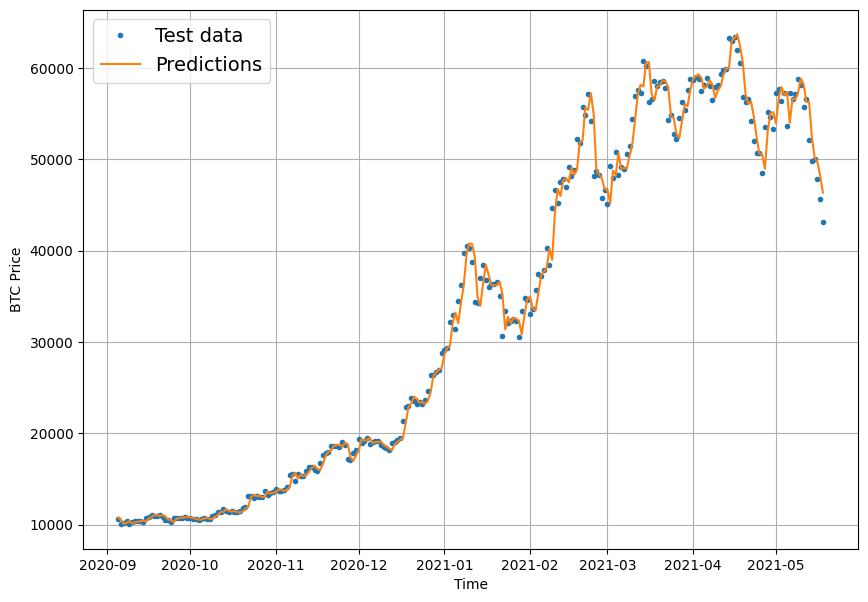

In [43]:
# Lets plot our model 1 predictions
offset = 300
plt.figure(figsize = ( 10 , 7 ))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : ,  0] , start = offset , label =  "Test data" )  # X_test kullanıyoruz çünkü windowların dimensionalityleri sebebiyle plot edemiyoruz. Sadece x_testte doğru indexleme yapmamız gerekiyor
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_1_pred , start = offset , format = "-" , label =  "Predictions" )

# Model 2 Dense : Window = 30 , Horizon = 1

In [44]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [45]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)


In [46]:
# Model 2 : Same as with model 1 but window size = 30
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_2_dense"
)
# Compile a model

model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_2 = model_2.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_2.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1269.2322 - mae: 1269.2322 

18/18 [==============================] - 2s 41ms/step - loss: 1269.2322 - mae: 1269.2322 - val_loss: 4682.0288 - val_mae: 4682.0288
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 466.5013 - mae: 466.5013

18/18 [==============================] - 1s 32ms/step - loss: 466.5013 - mae: 466.5013 - val_loss: 1927.2299 - val_mae: 1927.2299
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 283.5993 - mae: 283.5993

18/18 [==============================] - 1s 32ms/step - loss: 275.9467 - mae: 275.9467 - val_loss: 1580.3845 - val_mae: 1580.3845
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 247.8033 - mae: 247.8033

18/18 [==============================] - 1s 33ms/step - loss: 252.4458 - mae: 252.4458 - val_loss: 1437.0377 - val_mae: 1437.0377
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 190.1561 - mae: 190.1561

18/18 [==============================] - 1s 31ms/step - loss: 233.3704 - mae: 233.3704 - val_loss: 1213.2054 - val_mae: 1213.2054
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 212.9221 - mae: 212.9221

18/18 [==============================] - 1s 42ms/step - loss: 214.1310 - mae: 214.1310 - val_loss: 1114.0795 - val_mae: 1114.0795
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 194.5712 - mae: 194.5712

18/18 [==============================] - 1s 46ms/step - loss: 195.0073 - mae: 195.0073 - val_loss: 1098.6868 - val_mae: 1098.6868
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 185.3176 - mae: 185.3176

18/18 [==============================] - 1s 64ms/step - loss: 183.1123 - mae: 183.1123 - val_loss: 972.3951 - val_mae: 972.3951
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 163.2589 - mae: 163.2589

18/18 [==============================] - 1s 33ms/step - loss: 163.2556 - mae: 163.2556 - val_loss: 911.1960 - val_mae: 911.1960
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 158.1769 - mae: 158.1769

18/18 [==============================] - 1s 32ms/step - loss: 158.1769 - mae: 158.1769 - val_loss: 868.1616 - val_mae: 868.1616
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 150.9477 - mae: 150.9477 - val_loss: 960.0543 - val_mae: 960.0543
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 155.4076 - mae: 155.4076

18/18 [==============================] - 1s 32ms/step - loss: 154.7480 - mae: 154.7480 - val_loss: 835.7830 - val_mae: 835.7830
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 146.7667 - mae: 146.7667 - val_loss: 1016.1678 - val_mae: 1016.1678
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 152.2568 - mae: 152.2568 - val_loss: 918.7271 - val_mae: 918.7271
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 141.1971 - mae: 141.1971

18/18 [==============================] - 1s 33ms/step - loss: 140.7850 - mae: 140.7850 - val_loss: 799.2488 - val_mae: 799.2488
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 158.1398 - mae: 158.1398

18/18 [==============================] - 1s 32ms/step - loss: 159.9493 - mae: 159.9493 - val_loss: 786.4086 - val_mae: 786.4086
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 140.0491 - mae: 140.0491 - val_loss: 1107.8419 - val_mae: 1107.8419
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 163.2054 - mae: 163.2054 - val_loss: 839.3005 - val_mae: 839.3005
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 151.3579 - mae: 151.3579 - val_loss: 1493.7271 - val_mae: 1493.7271
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 172.7646 - mae: 172.7646 - val_loss: 915.7393 - val_mae: 915.7393
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 157.7706 - mae: 157.7706 - val_loss: 827.2878 - val_mae: 827.2878
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 136.7054 - mae: 136.7054

18/18 [==============================] - 1s 32ms/step - loss: 136.7328 - mae: 136.7328 - val_loss: 784.8197 - val_mae: 784.8197
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 148.1891 - mae: 148.1891 - val_loss: 995.9391 - val_mae: 995.9391
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 171.2340 - mae: 171.2340

18/18 [==============================] - 1s 31ms/step - loss: 138.6144 - mae: 138.6144 - val_loss: 723.0159 - val_mae: 723.0159
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 138.4130 - mae: 138.4130 - val_loss: 882.9173 - val_mae: 882.9173
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 131.6620 - mae: 131.6620 - val_loss: 743.4543 - val_mae: 743.4542
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 129.4601 - mae: 129.4601 - val_loss: 1010.3499 - val_mae: 1010.3499
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 140.1908 - mae: 140.1908 - val_loss: 754.6103 - val_mae: 754.6103
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 134.4916 - mae: 134.4916 - val_loss: 1126.3910 - val_mae: 1126.3910
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 147.9205 - mae: 147.9205 - val_loss: 1005.6851 - val_mae: 1005.6851
Epoch 31/100
18/18 [======

18/18 [==============================] - 1s 31ms/step - loss: 151.1801 - mae: 151.1801 - val_loss: 710.7457 - val_mae: 710.7457
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 127.4764 - mae: 127.4764

18/18 [==============================] - 1s 33ms/step - loss: 127.1545 - mae: 127.1545 - val_loss: 685.5385 - val_mae: 685.5385
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 139.2522 - mae: 139.2522 - val_loss: 1098.8347 - val_mae: 1098.8347
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 172.9132 - mae: 172.9132 - val_loss: 832.9620 - val_mae: 832.9620
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 123.3679 - mae: 123.3679

18/18 [==============================] - 1s 34ms/step - loss: 123.3679 - mae: 123.3679 - val_loss: 670.3585 - val_mae: 670.3585
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 121.1330 - mae: 121.1330 - val_loss: 688.4125 - val_mae: 688.4125
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 127.2954 - mae: 127.2954 - val_loss: 681.0605 - val_mae: 681.0605
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 124.2617 - mae: 124.2617

18/18 [==============================] - 1s 32ms/step - loss: 124.2617 - mae: 124.2617 - val_loss: 669.2316 - val_mae: 669.2316
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 126.4279 - mae: 126.4279 - val_loss: 713.7781 - val_mae: 713.7781
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 135.4244 - mae: 135.4244 - val_loss: 908.6785 - val_mae: 908.6785
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 196.3577 - mae: 196.3577

18/18 [==============================] - 1s 31ms/step - loss: 138.9549 - mae: 138.9549 - val_loss: 662.9017 - val_mae: 662.9017
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 121.6161 - mae: 121.6161 - val_loss: 718.2671 - val_mae: 718.2671
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 117.3771 - mae: 117.3771 - val_loss: 672.2769 - val_mae: 672.2769
Epoch 47/100
17/18 [===========================>..] - ETA: 0s - loss: 118.6413 - mae: 118.6413

18/18 [==============================] - 1s 37ms/step - loss: 118.8069 - mae: 118.8069 - val_loss: 648.4017 - val_mae: 648.4017
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 117.2698 - mae: 117.2698 - val_loss: 651.1638 - val_mae: 651.1638
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 117.4912 - mae: 117.4912 - val_loss: 651.7781 - val_mae: 651.7781
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 135.0201 - mae: 135.0201 - val_loss: 1169.8394 - val_mae: 1169.8394
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 152.5163 - mae: 152.5163 - val_loss: 1298.8308 - val_mae: 1298.8308
Epoch 52/100
18/18 [==============================] - 0s 8ms/step - loss: 151.7638 - mae: 151.7638 - val_loss: 720.2263 - val_mae: 720.2263
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 137.3992 - mae: 137.3992 - val_loss: 805.0102 - val_mae: 805.0102
Epoch 54/100
18/18 [========

18/18 [==============================] - 1s 46ms/step - loss: 152.4438 - mae: 152.4438 - val_loss: 641.6313 - val_mae: 641.6313
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 128.9991 - mae: 128.9991 - val_loss: 759.7284 - val_mae: 759.7284
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 131.8426 - mae: 131.8426 - val_loss: 690.4518 - val_mae: 690.4518
Epoch 59/100
18/18 [==============================] - ETA: 0s - loss: 148.4729 - mae: 148.4729

18/18 [==============================] - 1s 31ms/step - loss: 148.4729 - mae: 148.4729 - val_loss: 634.0667 - val_mae: 634.0667
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 114.7430 - mae: 114.7430 - val_loss: 677.7426 - val_mae: 677.7426
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 120.8590 - mae: 120.8590 - val_loss: 645.2424 - val_mae: 645.2424
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 117.8986 - mae: 117.8986 - val_loss: 799.8168 - val_mae: 799.8168
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 123.6798 - mae: 123.6798 - val_loss: 745.1832 - val_mae: 745.1832
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6746 - mae: 114.6746 - val_loss: 685.8520 - val_mae: 685.8520
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 116.6699 - mae: 116.6699

18/18 [==============================] - 1s 48ms/step - loss: 120.0392 - mae: 120.0392 - val_loss: 631.6739 - val_mae: 631.6739
Epoch 66/100
10/18 [===============>..............] - ETA: 0s - loss: 123.1628 - mae: 123.1628

18/18 [==============================] - 1s 34ms/step - loss: 116.8645 - mae: 116.8645 - val_loss: 618.5914 - val_mae: 618.5914
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 123.8159 - mae: 123.8159 - val_loss: 633.7607 - val_mae: 633.7607
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 120.0629 - mae: 120.0629 - val_loss: 618.8058 - val_mae: 618.8058
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 119.6023 - mae: 119.6023 - val_loss: 1034.7240 - val_mae: 1034.7240
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 137.3757 - mae: 137.3757 - val_loss: 973.0236 - val_mae: 973.0236
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 124.2381 - mae: 124.2381 - val_loss: 618.6640 - val_mae: 618.6640
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 113.9355 - mae: 113.9355

18/18 [==============================] - 1s 33ms/step - loss: 114.3605 - mae: 114.3605 - val_loss: 614.3795 - val_mae: 614.3795
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 123.8459 - mae: 123.8459 - val_loss: 654.4254 - val_mae: 654.4254
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2296 - mae: 122.2296 - val_loss: 637.2074 - val_mae: 637.2074
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9334 - mae: 115.9334 - val_loss: 654.1020 - val_mae: 654.1020
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 117.1730 - mae: 117.1730 - val_loss: 826.4597 - val_mae: 826.4597
Epoch 77/100
18/18 [==============================] - ETA: 0s - loss: 121.6571 - mae: 121.6571

18/18 [==============================] - 1s 32ms/step - loss: 121.6571 - mae: 121.6571 - val_loss: 609.2875 - val_mae: 609.2875
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5555 - mae: 113.5555 - val_loss: 626.1377 - val_mae: 626.1377
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 123.4763 - mae: 123.4763 - val_loss: 647.8218 - val_mae: 647.8218
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3657 - mae: 116.3657 - val_loss: 631.5429 - val_mae: 631.5429
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4092 - mae: 111.4092 - val_loss: 729.6202 - val_mae: 729.6202
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 125.0156 - mae: 125.0156 - val_loss: 698.0016 - val_mae: 698.0016
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 127.4540 - mae: 127.4540 - val_loss: 740.2795 - val_mae: 740.2795
Epoch 84/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 150.1391 - mae: 150.1391 - val_loss: 603.4360 - val_mae: 603.4360
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 115.8977 - mae: 115.8977 - val_loss: 628.5074 - val_mae: 628.5074
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 126.5293 - mae: 126.5293 - val_loss: 626.4964 - val_mae: 626.4964
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 126.0053 - mae: 126.0053 - val_loss: 1049.5176 - val_mae: 1049.5176
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 133.4733 - mae: 133.4733 - val_loss: 605.2159 - val_mae: 605.2159
Epoch 90/100
18/18 [==============================] - ETA: 0s - loss: 129.5237 - mae: 129.5237

18/18 [==============================] - 1s 32ms/step - loss: 129.5237 - mae: 129.5237 - val_loss: 602.8027 - val_mae: 602.8027
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6687 - mae: 119.6687 - val_loss: 614.1582 - val_mae: 614.1582
Epoch 92/100
16/18 [=========================>....] - ETA: 0s - loss: 114.4710 - mae: 114.4710

18/18 [==============================] - 1s 32ms/step - loss: 111.7440 - mae: 111.7440 - val_loss: 600.4327 - val_mae: 600.4327
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 123.4056 - mae: 123.4056 - val_loss: 939.0965 - val_mae: 939.0965
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 123.8370 - mae: 123.8370 - val_loss: 665.5121 - val_mae: 665.5121
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 126.4616 - mae: 126.4616 - val_loss: 668.7679 - val_mae: 668.7679
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 116.8135 - mae: 116.8135 - val_loss: 770.9735 - val_mae: 770.9735
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 120.6259 - mae: 120.6259 - val_loss: 689.5605 - val_mae: 689.5605
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4132 - mae: 113.4132 - val_loss: 742.2715 - val_mae: 742.2715
Epoch 99/100
18/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 117.2355 - mae: 117.2355 - val_loss: 599.7687 - val_mae: 599.7687


In [47]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense/")
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 599.7686 - mae: 599.7686


[599.7686157226562, 599.7686157226562]

In [48]:
model_2_preds = model_2.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [49]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_2_preds))
model_2_results

{'mae': 599.7687,
 'mse': 1257887.5,
 'rmse': 1121.5558,
 'mape': 2.6793451,
 'mase': 1.0484016}

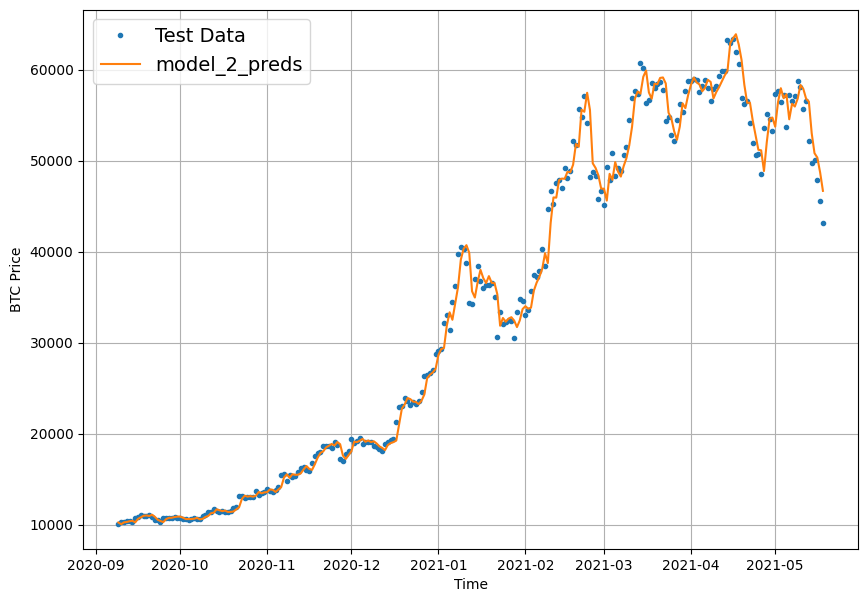

In [50]:
# Plot our function
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_2_preds , start = offset , format = "-" , label = "model_2_preds")

# Model 3 dense : Same as model 2 but , Window size = 30 , Horizon = 7

In [51]:
# Make windowed data with appropriate horizon and window size
WINDOW_SIZE = 30
HORIZON = 7
full_windows , full_labels = make_windows( prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)

(2751, 2751)

In [52]:
train_windows , test_windows , train_labels , test_labels =  make_train_test_splits(full_windows , full_labels)

In [53]:
# Model 3 : Same as with model 1 but window size = 30 and horizon = 7
tf.random.set_seed(42)
model_3 = tf.keras.Sequential(
    [
        layers.Dense( 128 , activation = "relu"),
        layers.Dense(HORIZON)
    ] , name = "model_3_dense"
)
# Compile a model

model_3.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["mae"]
                )

# Fit the model
hist_3 = model_3.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = ( test_windows , test_labels ) ,
    callbacks = [create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 2333.2966 - mae: 2333.2966 

18/18 [==============================] - 2s 42ms/step - loss: 1966.3162 - mae: 1966.3162 - val_loss: 3682.5317 - val_mae: 3682.5317
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 570.2416 - mae: 570.2416

18/18 [==============================] - 1s 33ms/step - loss: 569.1937 - mae: 569.1937 - val_loss: 2593.8262 - val_mae: 2593.8262
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 444.2633 - mae: 444.2633

18/18 [==============================] - 1s 32ms/step - loss: 446.8794 - mae: 446.8794 - val_loss: 2343.1809 - val_mae: 2343.1809
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 409.8932 - mae: 409.8932

18/18 [==============================] - 1s 32ms/step - loss: 409.8932 - mae: 409.8932 - val_loss: 2146.6731 - val_mae: 2146.6731
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 384.7134 - mae: 384.7134 - val_loss: 2178.6553 - val_mae: 2178.6553
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 368.0387 - mae: 368.0387

18/18 [==============================] - 1s 50ms/step - loss: 368.0387 - mae: 368.0387 - val_loss: 1919.9335 - val_mae: 1919.9335
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 347.2162 - mae: 347.2162

18/18 [==============================] - 1s 34ms/step - loss: 344.7673 - mae: 344.7673 - val_loss: 1714.0410 - val_mae: 1714.0410
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 296.0030 - mae: 296.0030

18/18 [==============================] - 1s 33ms/step - loss: 336.7124 - mae: 336.7124 - val_loss: 1705.1062 - val_mae: 1705.1062
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 319.0841 - mae: 319.0841 - val_loss: 1805.0262 - val_mae: 1805.0262
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 315.5780 - mae: 315.5780

18/18 [==============================] - 1s 32ms/step - loss: 315.5780 - mae: 315.5780 - val_loss: 1570.2140 - val_mae: 1570.2140
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 303.5834 - mae: 303.5834

18/18 [==============================] - 1s 32ms/step - loss: 303.5834 - mae: 303.5834 - val_loss: 1560.3536 - val_mae: 1560.3536
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 289.6646 - mae: 289.6646 - val_loss: 1686.5328 - val_mae: 1686.5328
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 257.7115 - mae: 257.7115

18/18 [==============================] - 1s 34ms/step - loss: 286.9237 - mae: 286.9237 - val_loss: 1510.1801 - val_mae: 1510.1801
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 284.4626 - mae: 284.4626

18/18 [==============================] - 1s 32ms/step - loss: 284.7787 - mae: 284.7787 - val_loss: 1487.6909 - val_mae: 1487.6909
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 278.4442 - mae: 278.4442 - val_loss: 1618.5558 - val_mae: 1618.5558
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 275.2422 - mae: 275.2422 - val_loss: 1510.1449 - val_mae: 1510.1449
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 273.2148 - mae: 273.2148 - val_loss: 1607.0676 - val_mae: 1607.0676
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 270.5923 - mae: 270.5923 - val_loss: 1596.1168 - val_mae: 1596.1168
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 268.2065 - mae: 268.2065 - val_loss: 1589.3292 - val_mae: 1589.3292
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 271.3005 - mae: 271.3005

18/18 [==============================] - 1s 31ms/step - loss: 271.6454 - mae: 271.6454 - val_loss: 1454.0560 - val_mae: 1454.0560
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 261.9088 - mae: 261.9088 - val_loss: 1483.7227 - val_mae: 1483.7227
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 262.2705 - mae: 262.2705

18/18 [==============================] - 1s 46ms/step - loss: 259.6718 - mae: 259.6718 - val_loss: 1415.3647 - val_mae: 1415.3647
Epoch 23/100
18/18 [==============================] - 0s 8ms/step - loss: 261.0833 - mae: 261.0833 - val_loss: 1431.0503 - val_mae: 1431.0503
Epoch 24/100
14/18 [======================>.......] - ETA: 0s - loss: 267.7337 - mae: 267.7337

18/18 [==============================] - 1s 45ms/step - loss: 264.8201 - mae: 264.8201 - val_loss: 1410.4366 - val_mae: 1410.4366
Epoch 25/100
18/18 [==============================] - 0s 8ms/step - loss: 265.1133 - mae: 265.1133 - val_loss: 1666.5520 - val_mae: 1666.5520
Epoch 26/100
18/18 [==============================] - 0s 8ms/step - loss: 261.3645 - mae: 261.3645 - val_loss: 1440.5698 - val_mae: 1440.5698
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 249.1453 - mae: 249.1453

18/18 [==============================] - 1s 39ms/step - loss: 252.1760 - mae: 252.1760 - val_loss: 1392.5485 - val_mae: 1392.5485
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 249.8607 - mae: 249.8607 - val_loss: 1449.7852 - val_mae: 1449.7852
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 252.1331 - mae: 252.1331 - val_loss: 1418.2286 - val_mae: 1418.2286
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 251.2244 - mae: 251.2244 - val_loss: 1394.2129 - val_mae: 1394.2129
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 216.6245 - mae: 216.6245

18/18 [==============================] - 1s 32ms/step - loss: 246.5231 - mae: 246.5231 - val_loss: 1344.7751 - val_mae: 1344.7751
Epoch 32/100
15/18 [========================>.....] - ETA: 0s - loss: 244.1772 - mae: 244.1772

18/18 [==============================] - 1s 32ms/step - loss: 246.5585 - mae: 246.5585 - val_loss: 1344.0470 - val_mae: 1344.0470
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 247.8401 - mae: 247.8401 - val_loss: 1370.5564 - val_mae: 1370.5564
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 244.7635 - mae: 244.7635 - val_loss: 1437.5428 - val_mae: 1437.5428
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 246.8076 - mae: 246.8076 - val_loss: 1364.3326 - val_mae: 1364.3326
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 243.0252 - mae: 243.0252 - val_loss: 1378.5111 - val_mae: 1378.5111
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 256.4542 - mae: 256.4542 - val_loss: 1411.4570 - val_mae: 1411.4570
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 242.0294 - mae: 242.0294 - val_loss: 1364.6597 - val_mae: 1364.6597
Epoch 39/100
18/18

18/18 [==============================] - 1s 34ms/step - loss: 236.7352 - mae: 236.7352 - val_loss: 1326.3422 - val_mae: 1326.3422
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 239.5266 - mae: 239.5266 - val_loss: 1344.5543 - val_mae: 1344.5543
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 237.5895 - mae: 237.5895 - val_loss: 1423.3430 - val_mae: 1423.3430
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 243.5927 - mae: 243.5927

18/18 [==============================] - 1s 33ms/step - loss: 243.5927 - mae: 243.5927 - val_loss: 1308.9556 - val_mae: 1308.9556
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 241.4114 - mae: 241.4114 - val_loss: 1456.4474 - val_mae: 1456.4474
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 239.9712 - mae: 239.9712 - val_loss: 1362.8467 - val_mae: 1362.8467
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 250.9729 - mae: 250.9729 - val_loss: 1422.2098 - val_mae: 1422.2098
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 238.9249 - mae: 238.9249 - val_loss: 1343.6964 - val_mae: 1343.6964
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 235.0219 - mae: 235.0219 - val_loss: 1388.7666 - val_mae: 1388.7666
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 232.0801 - mae: 232.0801 - val_loss: 1335.8582 - val_mae: 1335.8582
Epoch 53/100
18/18

18/18 [==============================] - 1s 31ms/step - loss: 231.7694 - mae: 231.7694 - val_loss: 1275.7556 - val_mae: 1275.7556
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 234.8186 - mae: 234.8186 - val_loss: 1292.7397 - val_mae: 1292.7397
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 231.7439 - mae: 231.7439 - val_loss: 1317.7782 - val_mae: 1317.7782
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 230.0808 - mae: 230.0808 - val_loss: 1354.4139 - val_mae: 1354.4139
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 236.1627 - mae: 236.1627 - val_loss: 1376.4261 - val_mae: 1376.4261
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 232.9014 - mae: 232.9014 - val_loss: 1314.6223 - val_mae: 1314.6223
Epoch 59/100
18/18 [==============================] - ETA: 0s - loss: 231.3139 - mae: 231.3139

18/18 [==============================] - 1s 34ms/step - loss: 231.3139 - mae: 231.3139 - val_loss: 1272.8391 - val_mae: 1272.8391
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 231.9153 - mae: 231.9153 - val_loss: 1272.8584 - val_mae: 1272.8584
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 229.9631 - mae: 229.9631 - val_loss: 1389.3101 - val_mae: 1389.3101
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 352.8652 - mae: 352.8652

18/18 [==============================] - 1s 51ms/step - loss: 234.4443 - mae: 234.4443 - val_loss: 1270.1523 - val_mae: 1270.1523
Epoch 63/100
18/18 [==============================] - 0s 12ms/step - loss: 234.2800 - mae: 234.2800 - val_loss: 1414.4141 - val_mae: 1414.4141
Epoch 64/100
18/18 [==============================] - 0s 19ms/step - loss: 229.2285 - mae: 229.2285 - val_loss: 1271.5204 - val_mae: 1271.5204
Epoch 65/100
18/18 [==============================] - 0s 13ms/step - loss: 232.3010 - mae: 232.3010 - val_loss: 1342.7733 - val_mae: 1342.7733
Epoch 66/100
18/18 [==============================] - 0s 11ms/step - loss: 233.3783 - mae: 233.3783 - val_loss: 1436.0500 - val_mae: 1436.0500
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 231.2687 - mae: 231.2687 - val_loss: 1338.7246 - val_mae: 1338.7246
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 226.2461 - mae: 226.2461 - val_loss: 1328.2708 - val_mae: 1328.2708
Epoch 69/100
1

18/18 [==============================] - 1s 63ms/step - loss: 230.6961 - mae: 230.6961 - val_loss: 1256.8047 - val_mae: 1256.8047
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 232.9214 - mae: 232.9214

18/18 [==============================] - 2s 114ms/step - loss: 231.8739 - mae: 231.8739 - val_loss: 1252.7400 - val_mae: 1252.7400
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 225.7571 - mae: 225.7571 - val_loss: 1278.6760 - val_mae: 1278.6760
Epoch 74/100
18/18 [==============================] - 0s 8ms/step - loss: 227.9476 - mae: 227.9476 - val_loss: 1353.0681 - val_mae: 1353.0681
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 226.4239 - mae: 226.4239 - val_loss: 1423.6266 - val_mae: 1423.6266
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 229.5884 - mae: 229.5884 - val_loss: 1310.6445 - val_mae: 1310.6445
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 226.5920 - mae: 226.5920 - val_loss: 1276.9067 - val_mae: 1276.9067
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 225.7776 - mae: 225.7776 - val_loss: 1276.8639 - val_mae: 1276.8639
Epoch 79/100
18/1

18/18 [==============================] - 1s 33ms/step - loss: 225.2780 - mae: 225.2780 - val_loss: 1242.2816 - val_mae: 1242.2816
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 227.7802 - mae: 227.7802 - val_loss: 1449.2643 - val_mae: 1449.2643
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 230.2832 - mae: 230.2832 - val_loss: 1284.2704 - val_mae: 1284.2704
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 225.4617 - mae: 225.4617 - val_loss: 1276.8524 - val_mae: 1276.8524
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 230.5589 - mae: 230.5589 - val_loss: 1392.9015 - val_mae: 1392.9015
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 231.2986 - mae: 231.2986 - val_loss: 1337.3943 - val_mae: 1337.3943
Epoch 98/100
18/18 [==============================] - ETA: 0s - loss: 230.6060 - mae: 230.6060

18/18 [==============================] - 1s 32ms/step - loss: 230.6060 - mae: 230.6060 - val_loss: 1235.4796 - val_mae: 1235.4796
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 223.2117 - mae: 223.2117 - val_loss: 1245.8259 - val_mae: 1245.8259
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 225.0119 - mae: 225.0119 - val_loss: 1384.3667 - val_mae: 1384.3667


In [54]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1235.4796 - mae: 1235.4796


[1235.4796142578125, 1235.4796142578125]

In [55]:
model_3_preds = model_3.predict(test_windows)

18/18 [==============================] - 0s 2ms/step


In [56]:
test_labels.shape , model_3_preds.shape

((551, 7), (551, 7))

In [57]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_3_preds))
model_3_results

{'mae': array([  579.5944  ,   411.50446 ,   308.1162  ,   435.19418 ,
          369.518   ,   371.21713 ,   418.0568  ,   472.0881  ,
          536.8282  ,   560.0158  ,   692.8105  ,   749.4136  ,
          875.277   ,   903.78827 ,   653.8078  ,   301.20795 ,
          138.18771 ,   219.91246 ,   256.06186 ,   253.4668  ,
          185.0067  ,   232.06934 ,   374.01834 ,   300.58365 ,
          186.89592 ,    76.22636 ,   105.57317 ,   186.13281 ,
          143.35938 ,   139.66121 ,   272.18192 ,   288.91086 ,
          287.05728 ,   284.82867 ,   278.0706  ,   240.36314 ,
          243.86824 ,   174.21603 ,   214.59361 ,   306.54855 ,
          501.41873 ,   145.0399  ,   129.2853  ,    83.027695,
           90.44629 ,    80.43743 ,    70.40674 ,    69.075195,
           83.36391 ,   145.04305 ,   141.43576 ,   141.57658 ,
           81.80797 ,   156.58412 ,   232.12381 ,   382.79117 ,
          582.0722  ,   589.88586 ,   534.5957  ,   614.3589  ,
          438.31613 ,   206.6446 

# Make our evaluation function work for larger horizons

In [58]:
model_2_results["mae"].ndim

0

In [59]:
model_3_results["mae"].ndim

1

In [60]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1235.4796 - mae: 1235.4796


[1235.4796142578125, 1235.4796142578125]

In [61]:
tf.reduce_mean(model_3_results["mae"]).numpy()  # Burda tensorflowun model loss u verirken yaptıgını yaptık aslında tek bir deger aldık outputumuza bu yüzden modelin mae evaluate iyle aynı çıktı

1235.4795

In [62]:
def evaluate_preds(y_true ,y_pred):
  """
  Evaluate all models
  """
  # Make sure float32 datatype ( for metric calculations). Tensorflow cogu zaman float32 dtype tercih ediyor eğer type error alırsan degerlerini float32 ye cevirmeyi dene
  y_true = tf.cast(y_true , dtype = tf.float32)
  y_pred = tf.cast(y_pred , dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(
    y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(
       y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(
    y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)   # Eğerki dimensionu 1 ve 1 den büyükse bizim outputumuzun mean alıyoruz değerlerde tek bir değer elde etmek icin.

  return  {
          "mae": mae.numpy() ,
          "mse": mse.numpy() ,
          "rmse": rmse.numpy() ,
          "mape": mape.numpy() ,
          "mase": mase.numpy()

         }


In [63]:
model_3_results = evaluate_preds( y_true = test_labels , y_pred = model_3_preds)
model_3_results

{'mae': 1235.4795,
 'mse': 5309428.0,
 'rmse': 1411.754,
 'mape': 5.520313,
 'mase': 2.1984668}

# Hava tahmini yaparken gibi düşün. İlk cama çıkıp havaya baktıgında hava kapalıysa 1 saat içinde yağmur yağacağını tahmin edersin ve bunun doğruluğu çok yüksektir. Fakat cama çıkıp havaya bakıp önümüzdeki 5. günü tahmin ettiğinde %90 yanlış çıkacaktır. Horizon belirlerken bunu düşünebilirsin.

In [64]:
test_labels.shape

(551, 7)

In [65]:
mod = tf.reduce_mean(model_3_preds , axis = 1)
mod

<tf.Tensor: shape=(551,), dtype=float32, numpy=
array([ 9372.811 ,  9080.369 ,  8892.4375,  9061.789 ,  8912.08  ,
        8833.794 ,  8784.25  ,  8689.106 ,  8490.087 ,  8391.739 ,
        8352.686 ,  8267.298 ,  8253.529 ,  8203.274 ,  7921.5034,
        7635.64  ,  7397.2544,  7197.242 ,  7184.2344,  7205.9556,
        7462.1284,  7495.407 ,  7759.362 ,  7684.482 ,  7594.8335,
        7449.2505,  7344.309 ,  7251.265 ,  7326.942 ,  7349.7827,
        7509.8037,  7488.8867,  7422.804 ,  7310.172 ,  7305.318 ,
        7247.1416,  7271.8394,  7212.9175,  7185.276 ,  6952.317 ,
        6732.3867,  7058.593 ,  7101.6196,  7154.8345,  7275.3247,
        7295.6216,  7281.5693,  7263.026 ,  7252.565 ,  7168.5713,
        7200.1753,  7238.2334,  7294.2666,  7351.132 ,  7224.562 ,
        7215.5044,  7075.9365,  7181.8706,  7343.0693,  7377.8604,
        7611.489 ,  7942.5225,  8096.8945,  8014.8647,  8089.282 ,
        8154.443 ,  8190.785 ,  8194.7295,  8620.446 ,  8913.584 ,
        8904.4

In [66]:
model_3_preds.shape

(551, 7)

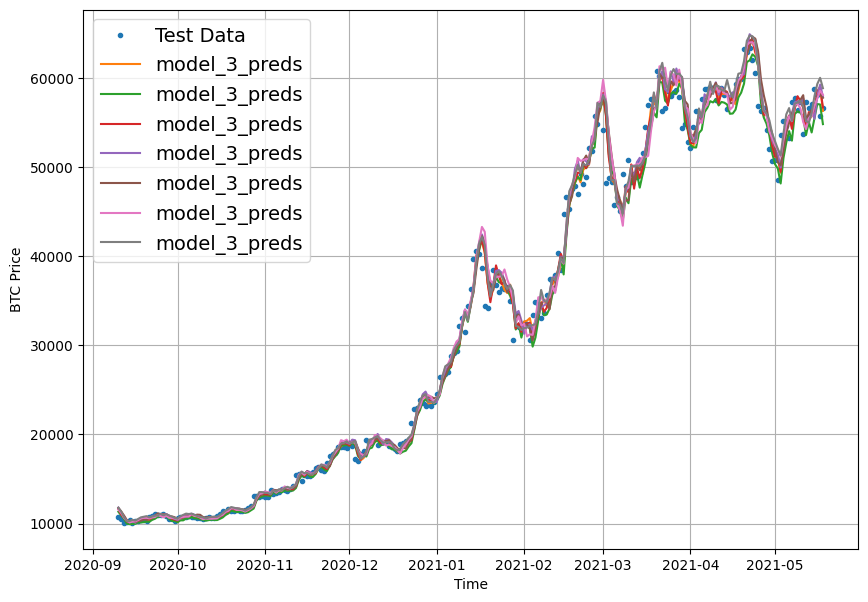

In [67]:
# Plot our function
# Plot ederken direkt x_test kullanmamamızın sebebi x_test datamız bütün tarihleri içeriyor daha train test diye ayrılmamış bir data. Bu yüzden biz test kısmını almak için test_windowsun lenghtini alıp ordan baslatıyoruz plot etmeye.
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = model_3_preds , start = offset , format = "-" , label = "model_3_preds")
# test_labels[ : , 0]   burda aslında her rowun 0. columnunu alıyoruz yani 7 tane prediction yaptıgımız horizonların hepsinin sadece 1. predictionunu alıyoruz.

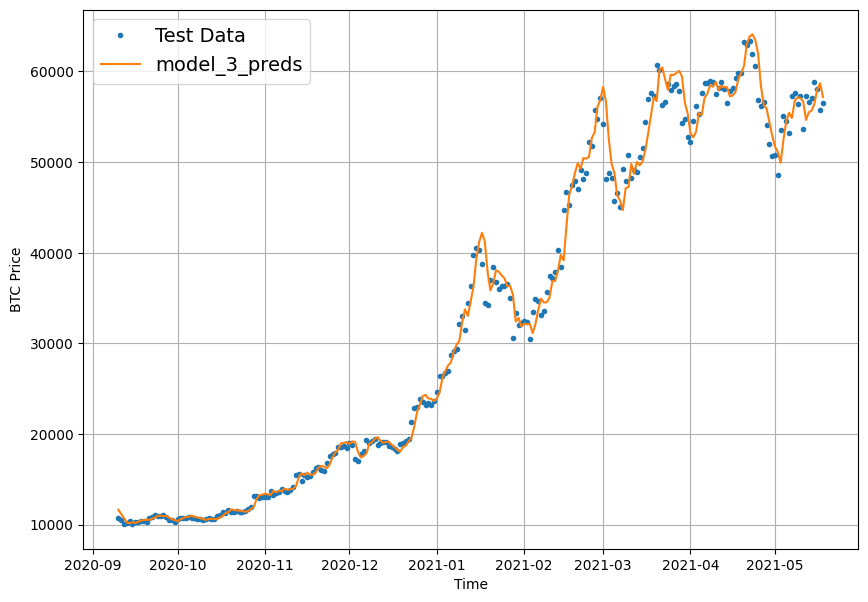

In [68]:
offset = 300
plt.figure(figsize = ( 10 , 7))
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = test_labels[ : , 0] , start = offset , label = "Test Data")
plot_time_series(timesteps = X_test[-len(test_windows) : ] , values = tf.reduce_mean(model_3_preds , axis = 1) , start = offset , format = "-" , label = "model_3_preds")
# Burda da aslında bütün 7 elementlik forecastlarımızın(horizon) tek tek average ını aldık. Yani aslında burda tam doğru değerleri görmüyoruz ama bize bit hint veriyor.

In [69]:
#

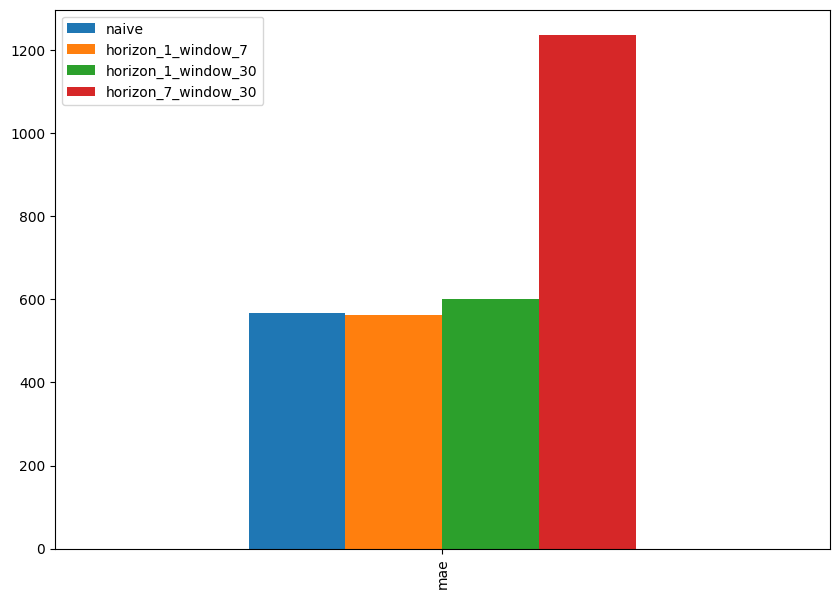

In [70]:
pd.DataFrame({
    "naive": naive_results["mae"] ,
    "horizon_1_window_7": model_1_results["mae"] ,
    "horizon_1_window_30": model_2_results["mae"] ,
    "horizon_7_window_30": model_3_results["mae"]
}  , index = ["mae"]
             ).plot(figsize = (10 , 7) , kind = "bar");

# Autocorrelation forecast incele

## You might be wondering, why are the naive results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestap) is typically close to the value at t (the current timestep). In other words , today's value is probably pretty close to yesterday's value. Of course, This isnt always the case but when it is (stock market prices often seem autocorrelated but often fluctuate randomly) , a naive model will often get fairly good results. resource: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [71]:
HORIZON = 1 # We will predict 1 number
WINDOW_SIZE = 7 # We will use 7 elements for training

In [72]:
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows) , len(full_labels)


(2780, 2780)

In [73]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows ,full_labels )
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

# To use the Conv1D layer , we need an input shape of : (batch_size , timesteps , input_dim).

However our data isnt in that shape yet.

In [74]:
# Check data input shape
train_windows[0].shape  # (WINDOW_SIZE , )

(7,)

In [75]:
# Before we pass our data to the Conv1D layer , we have to reshape it in order to make sure it works.
example = tf.constant(train_windows[0])
example

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [76]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1)) # Add extra dimension for input_dim
# lambda x: tf.expand_dims(x, axis=1): Bu Lambda katmanı bir işlevi tanımlar. İşlev, bir giriş tensörünü (x) alır ve bu tensörü işler. İşlev, giriş tensörünü bir boyut eklemek için tf.expand_dims fonksiyonunu kullanır. Bu işlev, giriş tensörünün her bir öğesini (örneğin bir veri noktasını) işler ve bu öğelerin her birini önceki boyutları koruyarak belirtilen eksen (axis=1) boyunca yeni bir boyut ekler.
# layers.Lambda: Bu, Keras'ın katmanlarını tanımlamak için kullanılan bir sınıftır. Lambda katmanı, özel bir işlevi (fonksiyonu) uygulamak için kullanılır. Bu işlev, katmanın giriş verilerini dönüştürmek veya manipüle etmek için kullanılır.

# Direkt tf.expand_dims kullanmayıp lambda layer kullanmamızın sebebi lambda layerı modelimize direkt ekleyebilecek olmamız

In [77]:
# Test out our lambda layer
print(f"Original shape : {example.shape} ")  # ( WINDOW_SIZE , )
print(f"Expanded shape : { expand_dims_layer(example).shape }")  # ( WINDOW_SIZE , input_dim )

Original shape : (7,) 
Expanded shape : (7, 1)


### NOTE: kernel_size defines the size of the sliding window.

The filters parameters is just how many different windows you will have (All of them with the same length , which is kernel_size) . How many different results or channels you want to produce.

When you use filters = 100 and kernel_size = 4 , you are creating 100 different filters , each of them with length 4. The result will bring 100 different convolutions.

### NOTE: Conv1D katmanları, girdi sıralı verileri üzerinde kaydırma işlemleri gerçekleştirir ve bu verilerdeki özellikleri çıkarır. Ardışık Conv1D katmanlarını bir araya getirerek daha karmaşık özellikleri yakalayabilirsiniz. Ancak sıralı verilerde tipik olarak Conv1D katmanları arasına pooling katmanları eklemeye gerek yoktur, çünkü Conv1D katmanları zaten sıralı verilerdeki özellikleri öğrenmek için yeterince yeteneklidir.

In [78]:
# Create a model
tf.random.set_seed(42)
model_4 = tf.keras.Sequential(
    [
        #expand_dims_layer ,  direkt bunu kullanabiliriz practice amaçlı baştan yazıcaz
        layers.Lambda(lambda x : tf.expand_dims(x , axis = 1)) ,
        layers.Conv1D(filters = 128 , activation = "relu" , kernel_size = 5 , padding = "causal" ) , # kernel_size = 5 dedigimizde strides = 1 oldugu icin default olarak windowun icine girip ilk 5 ine bakıyor sonrasında ilk elementi atlayıp sonraki 5 ine bakıyor böyle devam ediyor.
        # padding = causal olmasının sebebi causal olunca "model shouldnt violate the temporal order " bizim datamızda da temporal bir yapı oldugu icin casual kullanıyoruz.
        layers.Dense(HORIZON)
    ]  , name = "model_4_conv1d"
)
# Compile a model
model_4.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_4.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_4.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 976.2029 

18/18 [==============================] - 3s 59ms/step - loss: 976.2029 - val_loss: 2413.2798
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 270.5576

18/18 [==============================] - 1s 43ms/step - loss: 259.4930 - val_loss: 1019.9506
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 194.4724 - val_loss: 1027.4561
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 191.0028

18/18 [==============================] - 1s 61ms/step - loss: 185.1855 - val_loss: 995.6895
Epoch 5/100
12/18 [===================>..........] - ETA: 0s - loss: 185.8727

18/18 [==============================] - 1s 63ms/step - loss: 177.2996 - val_loss: 988.1605
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 173.0807

18/18 [==============================] - 1s 47ms/step - loss: 176.3155 - val_loss: 985.3167
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 179.0014

18/18 [==============================] - 1s 63ms/step - loss: 172.0697 - val_loss: 976.1394
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 166.6126

18/18 [==============================] - 1s 45ms/step - loss: 167.7340 - val_loss: 929.5197
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 167.6536 - val_loss: 982.6693
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 159.2223

18/18 [==============================] - 1s 44ms/step - loss: 162.6906 - val_loss: 894.2009
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 158.4557

18/18 [==============================] - 1s 44ms/step - loss: 158.1095 - val_loss: 882.4996
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 154.9693 - val_loss: 925.6060
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 153.6776 - val_loss: 919.8587
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 148.4987

18/18 [==============================] - 1s 43ms/step - loss: 151.1792 - val_loss: 854.2623
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 148.1380

18/18 [==============================] - 1s 43ms/step - loss: 146.9250 - val_loss: 844.7547
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 144.6017 - val_loss: 861.8907
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 141.8319 - val_loss: 852.1277
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 145.8078

18/18 [==============================] - 1s 43ms/step - loss: 141.0848 - val_loss: 818.8695
Epoch 19/100
15/18 [========================>.....] - ETA: 0s - loss: 134.7494

18/18 [==============================] - 1s 42ms/step - loss: 135.0701 - val_loss: 784.4861
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 135.3402

18/18 [==============================] - 1s 44ms/step - loss: 135.6308 - val_loss: 739.2828
Epoch 21/100
16/18 [=========================>....] - ETA: 0s - loss: 134.9518

18/18 [==============================] - 1s 46ms/step - loss: 135.7086 - val_loss: 720.2343
Epoch 22/100
15/18 [========================>.....] - ETA: 0s - loss: 135.3932

18/18 [==============================] - 1s 43ms/step - loss: 130.7858 - val_loss: 709.0733
Epoch 23/100
13/18 [====================>.........] - ETA: 0s - loss: 124.4215

18/18 [==============================] - 1s 58ms/step - loss: 128.2201 - val_loss: 703.3467
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 127.2292

18/18 [==============================] - 2s 92ms/step - loss: 128.1129 - val_loss: 689.0569
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 126.4736 - val_loss: 717.2664
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 128.5671 - val_loss: 703.4064
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 127.2043

18/18 [==============================] - 1s 44ms/step - loss: 125.9946 - val_loss: 666.5909
Epoch 28/100
14/18 [======================>.......] - ETA: 0s - loss: 118.3336

18/18 [==============================] - 1s 44ms/step - loss: 121.5870 - val_loss: 665.4794
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 118.5414

18/18 [==============================] - 1s 43ms/step - loss: 119.4600 - val_loss: 649.4079
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 120.9987

18/18 [==============================] - 1s 43ms/step - loss: 122.8060 - val_loss: 645.4685
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 117.5227 - val_loss: 667.4796
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 120.8690

18/18 [==============================] - 1s 43ms/step - loss: 118.3719 - val_loss: 640.7305
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 117.1940 - val_loss: 648.4239
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 117.3989

18/18 [==============================] - 1s 42ms/step - loss: 117.2814 - val_loss: 622.2361
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9072 - val_loss: 622.3074
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 116.2213

18/18 [==============================] - 1s 43ms/step - loss: 117.9485 - val_loss: 617.5682
Epoch 37/100
16/18 [=========================>....] - ETA: 0s - loss: 114.9584

18/18 [==============================] - 1s 43ms/step - loss: 115.6651 - val_loss: 611.3088
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 114.7533

18/18 [==============================] - 1s 41ms/step - loss: 114.6204 - val_loss: 607.2110
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 117.0748

18/18 [==============================] - 1s 42ms/step - loss: 114.1652 - val_loss: 605.1534
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6306 - val_loss: 606.0220
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1864 - val_loss: 637.2764
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 118.0567 - val_loss: 616.1438
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9940 - val_loss: 624.8289
Epoch 44/100
16/18 [=========================>....] - ETA: 0s - loss: 114.7617

18/18 [==============================] - 1s 45ms/step - loss: 114.7121 - val_loss: 595.1876
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5029 - val_loss: 596.9840
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0642 - val_loss: 618.5543
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9290 - val_loss: 691.5800
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1254 - val_loss: 611.6490
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2735 - val_loss: 597.8912
Epoch 50/100
17/18 [===========================>..] - ETA: 0s - loss: 116.4934

18/18 [==============================] - 1s 85ms/step - loss: 116.5658 - val_loss: 592.1146
Epoch 51/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7753 - val_loss: 606.0530
Epoch 52/100
18/18 [==============================] - 0s 9ms/step - loss: 113.0360 - val_loss: 593.8347
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 113.9222 - val_loss: 653.6428
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 120.3488 - val_loss: 651.8336
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 116.8459 - val_loss: 594.7367
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 109.3158 - val_loss: 715.0419
Epoch 57/100
16/18 [=========================>....] - ETA: 0s - loss: 114.7499

18/18 [==============================] - 1s 44ms/step - loss: 113.5278 - val_loss: 579.9146
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 110.4883 - val_loss: 585.5491
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 109.0711 - val_loss: 586.2891
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4876 - val_loss: 590.5118
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4034 - val_loss: 582.4682
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 110.5371 - val_loss: 582.7609
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7242 - val_loss: 591.0742
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4260 - val_loss: 602.6386
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6356 - val_loss: 600.7911
Epoch 66/100
16/18 [=========================>....] - ETA: 0s - loss: 111.11

18/18 [==============================] - 1s 44ms/step - loss: 110.1814 - val_loss: 578.4215
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2321 - val_loss: 650.5509
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2306 - val_loss: 588.9293
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0823 - val_loss: 663.0673
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 120.6225

18/18 [==============================] - 1s 43ms/step - loss: 119.1737 - val_loss: 572.3879
Epoch 71/100
16/18 [=========================>....] - ETA: 0s - loss: 107.5049

18/18 [==============================] - 1s 43ms/step - loss: 110.6943 - val_loss: 571.8647
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0296 - val_loss: 572.0592
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1886 - val_loss: 632.7169
Epoch 74/100
14/18 [======================>.......] - ETA: 0s - loss: 108.7612

18/18 [==============================] - 1s 43ms/step - loss: 109.0869 - val_loss: 571.6069
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8603 - val_loss: 595.1252
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3240 - val_loss: 612.9386
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1423 - val_loss: 576.5314
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1117 - val_loss: 584.7629
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 108.9095 - val_loss: 580.9863
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 109.0526 - val_loss: 636.1892
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 108.7543

18/18 [==============================] - 1s 42ms/step - loss: 109.2249 - val_loss: 568.1296
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 118.4764 - val_loss: 572.0234
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.1055 - val_loss: 708.4999
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9191 - val_loss: 586.7728
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9940 - val_loss: 597.9384
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3631 - val_loss: 590.4186
Epoch 87/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7615 - val_loss: 596.4892
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1597 - val_loss: 586.3611
Epoch 89/100
16/18 [=========================>....] - ETA: 0s - loss: 103.4428

18/18 [==============================] - 1s 44ms/step - loss: 108.1682 - val_loss: 566.3492
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1150 - val_loss: 592.9835
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9882 - val_loss: 645.6846
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1003 - val_loss: 591.6682
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 117.6363 - val_loss: 630.9402
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1060 - val_loss: 585.0660
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - loss: 108.0312

18/18 [==============================] - 1s 44ms/step - loss: 107.4087 - val_loss: 565.6479
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6357 - val_loss: 687.8661
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 111.3166 - val_loss: 569.9963
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1544 - val_loss: 586.0499
Epoch 99/100
15/18 [========================>.....] - ETA: 0s - loss: 106.3312

18/18 [==============================] - 1s 60ms/step - loss: 108.6047 - val_loss: 565.1779
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 119.4781 - val_loss: 731.4961


In [79]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Evaluate our model
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 731.4960


731.4960327148438

In [81]:
# Load back in the best performing Conv1D model and re-evaluate it
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d/")
model_4.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 565.1776


565.1776123046875

In [82]:
test_windows.shape , test_labels.shape

((556, 7), (556, 1))

In [83]:
model_4_preds = model_4.predict(test_windows)
test_labels.shape , tf.squeeze(model_4_preds).shape

18/18 [==============================] - 0s 3ms/step


((556, 1), TensorShape([556]))

In [84]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_4_preds))
model_4_results

{'mae': 565.1777,
 'mse': 1165926.5,
 'rmse': 1079.7808,
 'mape': 2.5279708,
 'mase': 0.9928606}

# Model 5: RNN (With LSTM)

We will use the same data we created previously.

In [85]:
tf.random.set_seed(42)
# Lets build a LSTM model with the Functional API
inputs = layers.Input(shape = WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x , axis = 1))(inputs)  # Because LSTM layers should take input with shape : A 3D tensor with shape [batch, timesteps, feature].
#x = layers.LSTM(128 , return_sequences = True)(x)
x = layers.LSTM(128 , activation = "relu")(x)  # Default hyperparameterlarla modelimiz çok kötü mae verdi bu yüzden tuning yapacağız.
#x = layers.Dense(32 , activation = "relu")(x)  Bunlarla beraber denedik modelimiz yine improve olmadı
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs , outputs , name = "model_5_lstm")


In [86]:
# Compile a model
model_5.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                # metrics = ["mae"]  loss function mae kullandıgımız icin metrics yazmamıza gerek yok.
                )

# Fit the model
model_5.fit(
    train_windows ,
    train_labels ,
    epochs = 100 ,
    batch_size = 128 ,
    validation_data = (test_windows , test_labels) ,
    callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 124ms/step - loss: 2368.0447 - val_loss: 8836.5576
Epoch 2/100
18/18 [==============================] - 2s 108ms/step - loss: 533.1905 - val_loss: 1944.4653
Epoch 3/100
18/18 [==============================] - 2s 107ms/step - loss: 231.7847 - val_loss: 1149.2467
Epoch 4/100
18/18 [==============================] - 2s 117ms/step - loss: 196.3723 - val_loss: 1100.4075
Epoch 5/100
18/18 [==============================] - 3s 161ms/step - loss: 189.2757 - val_loss: 1078.7706
Epoch 6/100
18/18 [==============================] - 2s 107ms/step - loss: 190.4995 - val_loss: 1051.6808
Epoch 7/100
18/18 [==============================] - 2s 107ms/step - loss: 190.0672 - val_loss: 1044.1764
Epoch 8/100
18/18 [==============================] - 2s 110ms/step - loss: 184.1288 - val_loss: 1037.9677
Epoch 9/100
18/18 [==============================] - 2s 135ms/step - loss: 181.5636 - val_loss: 982.5865
Epoch 10/100
18/18 [==========================

In [87]:
# Load in best version of model_5 and evaluate it
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm/")
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.5190


573.51904296875

In [88]:
model_5_preds = model_5.predict(test_windows)
model_5_preds.shape

18/18 [==============================] - 0s 2ms/step


(556, 1)

In [89]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels) , y_pred = tf.squeeze(model_5_preds))
model_5_results

{'mae': 573.51904,
 'mse': 1194141.2,
 'rmse': 1092.7677,
 'mape': 2.5666559,
 'mase': 1.0075141}

### Because neural networks are such powerful algorihtms , they can be used for almost any problem , however , that doesnt mean they will achieve performant or usable results.

# Make a multivariate time series dataset

Before we add a feature to our time series data , what is a feature we can use?

Bizim şu anki datamız open system bir data yani bunun grafiğini her şey değiştirebilir. Bu yüzden biz buna dışarıdan her türlü feature ekleyebiliriz.

One feature we could add is whether or not Elong Trust tweeted on that day.
* day 1 - 0 (this number is  how many tweeted on this day)
* day 2 - 1
* day 3 - 0

What is a better feature to use?

How about the bitcoin halving events?(miningte kazdıgın her blok icin verilen bitcoin ödülünü yarıya düşürme eventi)(daha az , daha değerli olduğu için bu event olduktan sonra bitcoinin değeri artıyor.)

https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [90]:
# Lets make a multivariate time series
bitcoin_prices.head()


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [91]:
bitcoin_prices.tail()

,Price
Date,
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255
2021-05-17,45604.615754
2021-05-18,43144.471291


In [92]:
# Lets add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward wont be in our dataset (our dataset starts from 01 October 2013 )
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates (we should add these values as our data's dates type like 2013-10-04)
block_reward_2_datetime = np.datetime64("2012-11-28")  # Sondaki 64 dtype ı belirtiyor.
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

# Bizim bi range oluşturmamız gerek bu tarihlerle. mesela block_reward_2_datetime ile block_reward_3_datetime arasındaki tarihlerde rewardımız 25 olacak. Kalanları da aynı bu şekilde ayarlayacağız.

In [93]:
 bitcoin_prices.index[0]

Timestamp('2013-10-01 00:00:00')

In [94]:
 bitcoin_prices.index[ -1 : ]

DatetimeIndex(['2021-05-18'], dtype='datetime64[ns]', name='Date', freq=None)

In [95]:
# Create date ranges of where spesific block_reward values should be
block_reward_2_days =  (block_reward_3_datetime - bitcoin_prices.index[0]).days # Because we set up our block_reward_2_datetime object as np.datetime , we can use this with the indexes on our Bitcoin prices DataFrame. bitcoin_prices.index[0] bizim datamızdaki ilk tarihi verecek. Datamızdaki ilk tarihten itibaren alıyoruz çünkü bizim datamızda 2012 verileri yok. İki datetime ı birbirinden çıakrdığımız için .days attribute kullanabiliyoruz.
block_reward_2_days

1012

In [96]:
block_reward_3_days = ( block_reward_4_datetime - bitcoin_prices.index[0] ).days
block_reward_2_days , block_reward_3_days
# ilk günden 1012. güne kadar  reward 25 , 1012. günden 2041. güne kadar reward 12 , 2421 den sonraki günler için reward 6.25 olacak

(1012, 2421)

In [97]:
# Add in a block reward column
bitcoin_prices_block = bitcoin_prices.copy()  # bitcoin_prices dataframe imizin aynısını kopyaladık.
bitcoin_prices_block["block_reward"] = None    # block_reward columnu ekledik en başta boş olarak ekliyoruz sonrasında dolduruyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [98]:
# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[ : block_reward_2_days , -1] = block_reward_2  # Index eklemek istediğimiz icin iloc kullanıyoruz. Son columnda block_rewardlarımız oldugu icin ve biz bunları doldurmak istedigimiz icin column kısmına -1 diyoruz.
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [99]:
bitcoin_prices_block.iloc[ block_reward_2_days : block_reward_3_days , -1 ] = block_reward_3
bitcoin_prices_block.iloc[ block_reward_3_days :  , -1 ] = block_reward_4
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

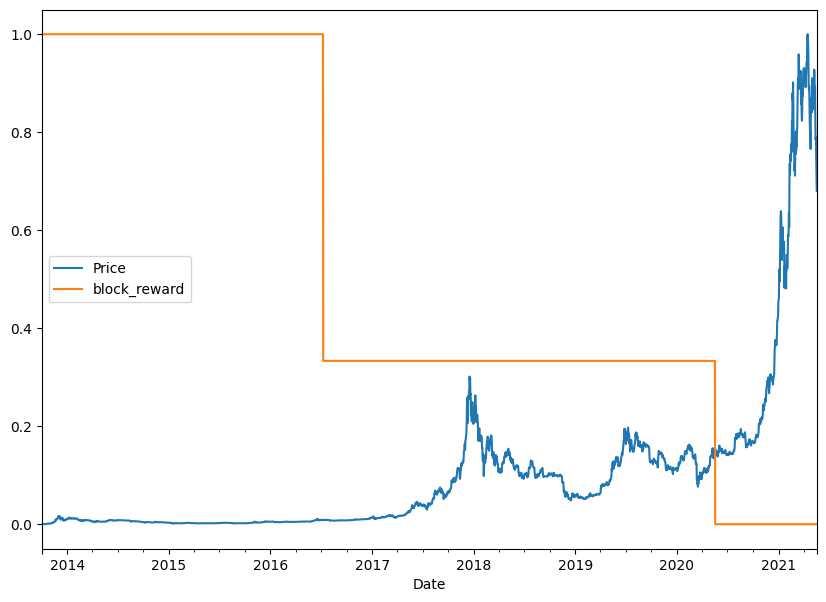

In [100]:
# Plot the block reward vs price over time.
# minmax_scale bütün değerleri 0 la 1 arasına sıkıştırıyor.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(
    minmax_scale( bitcoin_prices_block[ [ "Price" , "block_reward" ] ] ) ,
    columns = bitcoin_prices_block.columns ,
    index = bitcoin_prices_block.index
    )

scaled_price_block_df.plot(figsize = (10 , 7))

# Making a windowed dataset with pandas

Previously , we have turned our univariate time series into windowed dataset using the helper function above.

However , since we have got multivariate data , these functions wont work.

Not to worry , we can use pandas.DataFrame.shift() method to window our multivariate data.

In [101]:
# Setup dataset parameters
HORIZON = 1
WINDOW_SIZE = 7

In [102]:
# Make a copy of the bitcoin historcal data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price + {i+1}"] = bitcoin_prices_windowed["Price"].shift( periods = i + 1 )

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is created a way to window our dataset directly from a pandas dataframe. Yani mesela 2013-10-08	bu tarihteki price+1 den başlayıp price+7 ye kadar olan valuelar bizim bildiğimiz windowumuz train için kullandığımız datamız yani üstteki modellerde nasıl yaptıysak onun aynısı. Price columndaki değer de bizim actual horizonumuz. Yani biz window label ayırma işini aslında pandas dataframe i ile yaptık yaptıgımız baska bir sey degil.

In [103]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price" , axis = 1).astype(np.float32)
# Bu işlem, "price" sütununu veri çerçevesinden kaldırır ve sonucunda "Price" sütunu olmayan yeni bir DataFrame döndürür. Bu nedenle, axis=1 kullanarak sütun bazlı bir işlem gerçekleştirilir. Eğer axis=0 olarak ayarlarsanız, satırlar üzerinde işlem yaparsınız ve belirlediğiniz satırı çıkarırsınız.
# .dropna ile DataFrame imizdeki içinde NAN olan rowların hepsini kaldırıyor.
# Price columnu ayırmamızın sebebi biz X ile windowlarımızı oluşturuyoruz. Price columnu bizim horizon değerlerimizi tutuyor.
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price + 1,Price + 2,Price + 3,Price + 4,Price + 5,Price + 6,Price + 7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [104]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

# Make train/test sets using indexing

In [105]:
split_size = int(len(X) * 0.8)
X_train , y_train = X[ : split_size] , y[ : split_size]
X_test , y_test = X[ split_size: ] , y[ split_size : ]

len( X_train) , len(y_train)  , len(X_test) , len(y_test)

(2224, 2224, 556, 556)

In [106]:
y_train

Date
2013-10-08     123.032997
2013-10-09     124.049004
2013-10-10     125.961159
2013-10-11     125.279663
2013-10-12     125.927498
                 ...     
2019-11-05    9369.627930
2019-11-06    9326.599609
2019-11-07    9335.751953
2019-11-08    9226.485352
2019-11-09    8794.358398
Name: Price, Length: 2224, dtype: float32

In [107]:
X_train.shape , y_train.shape

((2224, 8), (2224,))

# Model 6 : Same as model 1 but with block_reward

In [108]:
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential(
    [
        layers.Dense(128 , activation = "relu") ,
        layers.Dense(HORIZON)
    ] , name = "model_6_multivariate"
)
# Compile a model
model_6.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam()
                )

# Fit the model
model_6.fit(
    X_train ,
    y_train ,
    epochs = 100 ,
    validation_data = (X_test , y_test) ,
    batch_size = 128 ,
    callbacks = [create_model_checkpoint(model_name = model_6.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 16s - loss: 5484.5464

18/18 [==============================] - 2s 38ms/step - loss: 3378.5259 - val_loss: 9803.4512
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1212.4050

18/18 [==============================] - 1s 31ms/step - loss: 597.8897 - val_loss: 2637.4478
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 363.2755

18/18 [==============================] - 1s 30ms/step - loss: 244.6189 - val_loss: 917.0685
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 212.6577

18/18 [==============================] - 1s 30ms/step - loss: 177.7028 - val_loss: 896.9296
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 161.3981

18/18 [==============================] - 1s 30ms/step - loss: 161.3981 - val_loss: 866.6736
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 120.5106

18/18 [==============================] - 1s 30ms/step - loss: 159.5189 - val_loss: 861.5139
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 192.2090

18/18 [==============================] - 1s 30ms/step - loss: 151.7745 - val_loss: 846.0592
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 147.7075

18/18 [==============================] - 1s 31ms/step - loss: 148.1277 - val_loss: 811.2823
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 147.8434 - val_loss: 864.3499
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 145.3152

18/18 [==============================] - 1s 30ms/step - loss: 145.3152 - val_loss: 793.2844
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 148.3631

18/18 [==============================] - 1s 51ms/step - loss: 141.6848 - val_loss: 773.7022
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 139.6050 - val_loss: 863.2788
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 139.7764 - val_loss: 775.2556
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 143.5051

18/18 [==============================] - 1s 42ms/step - loss: 135.3102 - val_loss: 754.8496
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 134.5144 - val_loss: 769.3278
Epoch 16/100
13/18 [====================>.........] - ETA: 0s - loss: 133.4069

18/18 [==============================] - 1s 47ms/step - loss: 132.9016 - val_loss: 745.1805
Epoch 17/100
15/18 [========================>.....] - ETA: 0s - loss: 128.2435

18/18 [==============================] - 1s 46ms/step - loss: 131.1330 - val_loss: 734.8163
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 132.1956

18/18 [==============================] - 1s 31ms/step - loss: 131.2620 - val_loss: 707.6018
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 75.6041

18/18 [==============================] - 1s 30ms/step - loss: 130.1649 - val_loss: 695.9764
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 132.8452 - val_loss: 782.3804
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 131.0393

18/18 [==============================] - 1s 31ms/step - loss: 131.8945 - val_loss: 681.4971
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 128.8159

18/18 [==============================] - 1s 31ms/step - loss: 128.8159 - val_loss: 669.4432
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 122.9043

18/18 [==============================] - 1s 32ms/step - loss: 124.1680 - val_loss: 664.7461
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 135.5233

18/18 [==============================] - 1s 32ms/step - loss: 122.7913 - val_loss: 660.4692
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 135.1825

18/18 [==============================] - 1s 30ms/step - loss: 121.8086 - val_loss: 652.8891
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 123.2357 - val_loss: 695.7136
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 188.9755

18/18 [==============================] - 1s 31ms/step - loss: 123.0337 - val_loss: 643.7949
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 118.9289 - val_loss: 645.3333
Epoch 29/100
18/18 [==============================] - 0s 5ms/step - loss: 117.9291 - val_loss: 644.0778
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 132.3905

18/18 [==============================] - 1s 31ms/step - loss: 120.9135 - val_loss: 640.3504
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 122.4557 - val_loss: 755.7006
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 121.5846

18/18 [==============================] - 1s 30ms/step - loss: 121.5846 - val_loss: 639.0038
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 116.7081 - val_loss: 644.6045
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 127.7005

18/18 [==============================] - 1s 31ms/step - loss: 118.1438 - val_loss: 619.8560
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 100.5475

18/18 [==============================] - 1s 30ms/step - loss: 115.3016 - val_loss: 619.0626
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 123.8062 - val_loss: 663.1885
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 148.9934

18/18 [==============================] - 1s 30ms/step - loss: 118.0485 - val_loss: 617.1568
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 102.7731

18/18 [==============================] - 1s 30ms/step - loss: 115.4325 - val_loss: 611.3164
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2002 - val_loss: 634.7114
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3689 - val_loss: 623.4275
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0531 - val_loss: 620.0691
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 111.7915

18/18 [==============================] - 1s 30ms/step - loss: 118.4968 - val_loss: 603.6537
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4408 - val_loss: 635.6381
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2267 - val_loss: 628.9971
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3752 - val_loss: 621.7698
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 88.0332

18/18 [==============================] - 1s 30ms/step - loss: 115.1782 - val_loss: 598.5049
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3039 - val_loss: 634.4504
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 112.8089 - val_loss: 613.9333
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 113.6451 - val_loss: 629.7676
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 121.2344 - val_loss: 634.8257
Epoch 51/100
18/18 [==============================] - 0s 8ms/step - loss: 114.3625 - val_loss: 642.4478
Epoch 52/100
18/18 [==============================] - 0s 8ms/step - loss: 116.1856 - val_loss: 642.5488
Epoch 53/100
14/18 [======================>.......] - ETA: 0s - loss: 118.2880

18/18 [==============================] - 1s 74ms/step - loss: 117.1995 - val_loss: 591.5873
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 112.7233 - val_loss: 610.1221
Epoch 55/100
14/18 [======================>.......] - ETA: 0s - loss: 118.3018

18/18 [==============================] - 1s 39ms/step - loss: 114.0035 - val_loss: 589.0596
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2668 - val_loss: 779.9371
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 132.0676 - val_loss: 653.7855
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 121.4620 - val_loss: 670.8127
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2575 - val_loss: 606.8278
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6075 - val_loss: 626.8528
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1839 - val_loss: 605.3878
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2691 - val_loss: 603.8463
Epoch 63/100
16/18 [=========================>....] - ETA: 0s - loss: 110.8999

18/18 [==============================] - 1s 32ms/step - loss: 110.5555 - val_loss: 588.7001
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8665 - val_loss: 626.1349
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 113.4524

18/18 [==============================] - 1s 32ms/step - loss: 113.4524 - val_loss: 583.1488
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8445 - val_loss: 584.8172
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9873 - val_loss: 632.9677
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7017 - val_loss: 684.1076
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 127.4809 - val_loss: 730.3339
Epoch 70/100
18/18 [==============================] - ETA: 0s - loss: 119.2659

18/18 [==============================] - 1s 32ms/step - loss: 119.2659 - val_loss: 579.5024
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8331 - val_loss: 601.2764
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7900 - val_loss: 580.3267
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1222 - val_loss: 697.7139
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9573 - val_loss: 580.1304
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6162 - val_loss: 584.0048
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 79.1720

18/18 [==============================] - 1s 30ms/step - loss: 109.6675 - val_loss: 578.9398
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1917 - val_loss: 580.1592
Epoch 78/100
18/18 [==============================] - ETA: 0s - loss: 109.1136

18/18 [==============================] - 1s 30ms/step - loss: 109.1136 - val_loss: 577.9420
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1521 - val_loss: 593.2447
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 119.3098

18/18 [==============================] - 1s 30ms/step - loss: 109.1670 - val_loss: 574.2997
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2941 - val_loss: 576.0526
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0923 - val_loss: 578.1719
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4097 - val_loss: 656.1592
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1626 - val_loss: 590.5266
Epoch 85/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0407 - val_loss: 582.9891
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4575 - val_loss: 608.0223
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7329 - val_loss: 578.1630
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9044 - val_loss: 609.6965
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 10

18/18 [==============================] - 1s 32ms/step - loss: 107.8809 - val_loss: 570.4164
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 151.0512

18/18 [==============================] - 1s 29ms/step - loss: 108.4151 - val_loss: 570.2344
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 113.4914 - val_loss: 671.4889


In [109]:
# Load the best performing model_6
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_multivariate/")
model_6.evaluate(X_test , y_test)

18/18 [==============================] - 0s 2ms/step - loss: 570.2346


570.234619140625

In [110]:
# Make predictions
model_6_preds = model_6.predict(X_test)
model_6_preds.shape


18/18 [==============================] - 0s 2ms/step


(556, 1)

In [111]:
y_test.shape

(556,)

In [112]:
model_6_results = evaluate_preds(
    y_true = y_test ,
    y_pred = tf.squeeze(model_6_preds)
)
model_6_results

{'mae': 570.2346,
 'mse': 1171322.9,
 'rmse': 1082.2767,
 'mape': 2.5523233,
 'mase': 1.0017443}

# Model 7 : N-BEATS Algorithm
Lets now try to build the biggest baddest ( though maybe not the baddest , as in , it performly very well ) time series forecasting model we have built so far.

More spesifically , we are going to replicating the algorithm in figure 1 from the paper : https://arxiv.org/pdf/1905.10437.pdf

* We will see how to use tensorflow layer subclassing ( to make our own custom layers.)
* Get experience using the functional API to create a custom architecture.
* Potentially get state of the art results on our problem.

### Building and testing the NBEATS block layer

Because the NBEATS block layer doesnt exist in tensorflow , we have got to create this.

To create custom layers and models in tensorflow , we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

Note : Fully connected layers means Dense layers.


In [ ]:
# Create NBeatBlock custom layer. We are using subclassing because to create a layer in a network doesnt already exist in tensorflow.
class NBeatBlock(tf.keras.layers.Layer):
  def __init__(self ,
               input_size : int ,
               theta_size : int ,
               horizon : int ,
               n_neurons : int ,
               n_layers : int ,
               **kwargs   # the **kwargs argument takes care of all the arguments for the parent class (e.g. input_shape , trainable , name )(bütün default valueları biz girmemiş olsak bile **kwargs ile onları da default olarak eklemiş oluyoruz.)
               ):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers


